# Exploratory Data Analysis - Toni Kroos

## Import Libraries

In [ ]:
# Operating System
import os
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Import Visualization
import matplotlib.pyplot as plt
# Seaborn Statistical Visualization
import seaborn as sns
# Stats & Kurtosis
from scipy import stats
from scipy.stats import kurtosis
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# Statistical Modeling
import statsmodels.api as sm

### M.L Libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nonconformist.nc import RegressorNc
from nonconformist.icp import IcpRegressor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Loading DataFrame

In [ ]:
# Loading DataFrame 
df = pd.read_csv('/work/kroos-clean.csv')
df

match                    competition  \
0       Manchester City - Real Madrid 4:0  Europe. UEFA Champions League   
1       Real Madrid - Manchester City 1:1  Europe. UEFA Champions League   
2               Chelsea - Real Madrid 0:2  Europe. UEFA Champions League   
3               Real Madrid - Chelsea 2:0  Europe. UEFA Champions League   
4             Real Madrid - Liverpool 1:0  Europe. UEFA Champions League   
5             Liverpool - Real Madrid 2:5  Europe. UEFA Champions League   
6                Real Madrid - Celtic 5:1  Europe. UEFA Champions League   
7            RB Leipzig - Real Madrid 3:2  Europe. UEFA Champions League   
8      Shakhtar Donetsk - Real Madrid 1:1  Europe. UEFA Champions League   
9      Real Madrid - Shakhtar Donetsk 2:1  Europe. UEFA Champions League   
10           Real Madrid - RB Leipzig 2:0  Europe. UEFA Champions League   
11               Celtic - Real Madrid 0:3  Europe. UEFA Champions League   
12            Liverpool - Real Madrid 0:1  Europe. UEFA Champions League   
13  Real Madrid - Manchester City 3:1 (E)  Europe. UEFA Champions League   
14      Manchester City - Real Madrid 4:3  Europe. UEFA Champions League   
15          Real Madrid - Chelsea 2:3 (E)  Europe. UEFA Champions League   
16              Chelsea - Real Madrid 1:3  Europe. UEFA Champions League   
17                  Real Madrid - PSG 3:1  Europe. UEFA Champions League   
18                  PSG - Real Madrid 1:0  Europe. UEFA Champions League   
19       Real Madrid - Internazionale 2:0  Europe. UEFA Champions League   
20              Sheriff - Real Madrid 0:3  Europe. UEFA Champions League   
21     Real Madrid - Shakhtar Donetsk 2:1  Europe. UEFA Champions League   
22     Shakhtar Donetsk - Real Madrid 0:5  Europe. UEFA Champions League   
23              Real Madrid - Sheriff 1:2  Europe. UEFA Champions League   
24              Chelsea - Real Madrid 2:0  Europe. UEFA Champions League   
25              Real Madrid - Chelsea 1:1  Europe. UEFA Champions League   
26            Liverpool - Real Madrid 0:0  Europe. UEFA Champions League   
27            Real Madrid - Liverpool 3:1  Europe. UEFA Champions League   
28             Real Madrid - Atalanta 3:1  Europe. UEFA Champions League   
29             Atalanta - Real Madrid 0:1  Europe. UEFA Champions League   

        date     position  minutes_played  total_actions   \
0    5/17/23         LDMF              71              62   
1     5/9/23          DMF              86              70   
2    4/18/23          DMF              78              73   
3    4/12/23          DMF              84             102   
4    3/15/23        LCMF3              85              83   
5    2/21/23            0               7              22   
6    11/2/22          DMF              91             112   
7   10/25/22         LDMF              76             105   
8   10/11/22    DMF, LDMF             101             138   
9    10/5/22        LCMF3              94             108   
10   9/14/22         LCMF              13               7   
11    9/6/22   DMF, LCMF3              93             134   
12   5/28/22        LCMF3             100             116   
13    5/4/22         LDMF              70              63   
14   4/26/22    DMF, LCMF              95              82   
15   4/12/22  LCMF, LCMF3              74              76   
16    4/6/22        LCMF3              75              57   
17    3/9/22          DMF              59              70   
18   2/15/22        LCMF3              95             116   
19   12/7/21         LCMF              78              79   
20  11/24/21        LCMF3              96             130   
21   11/3/21         LCMF              94             113   
22  10/19/21        LCMF3              78              96   
23   9/28/21         LCMF              32              40   
24    5/5/21  LCMF, LCMF3              95             110   
25   4/27/21  LCMF, LCMF3              94             127   
26   4/14/21         LCMF       

In [ ]:
# DataFrame General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match                     30 non-null     object 
 1   competition               30 non-null     object 
 2   date                      30 non-null     object 
 3   position                  30 non-null     object 
 4   minutes_played            30 non-null     int64  
 5   total_actions             30 non-null     int64  
 6   total_actions_successful  30 non-null     int64  
 7   TAS_percent               30 non-null     int64  
 8   goals                     30 non-null     int64  
 9   assists                   30 non-null     int64  
 10  shots                     30 non-null     int64  
 11  shots_on_target           30 non-null     int64  
 12  SOT_percent               30 non-null     int64  
 13  xG                        30 non-null     float64
 14  passes      

In [ ]:
df.isnull().sum()

match                       0
competition                 0
date                        0
position                    0
minutes_played              0
total_actions               0
total_actions_successful    0
TAS_percent                 0
goals                       0
assists                     0
shots                       0
shots_on_target             0
SOT_percent                 0
xG                          0
passes                      0
passes_accurate             0
PA_accurate                 0
long_passes                 0
long_passes_accurate        0
LPA_percent                 0
crosses                     0
crosses_accurate            0
CA_percent                  0
dribbles                    0
dribbles_successful         0
DS_percent                  0
duels                       0
duels_won                   0
DW_percent                  0
aerial_duels_won            0
aerial_duels_won.1          0
ADW_percent                 0
interceptions               0
losses    

In [ ]:
# Row & Columns 
print(df.shape)

(30, 39)


In [ ]:
df.count()

match                       30
competition                 30
date                        30
position                    30
minutes_played              30
total_actions               30
total_actions_successful    30
TAS_percent                 30
goals                       30
assists                     30
shots                       30
shots_on_target             30
SOT_percent                 30
xG                          30
passes                      30
passes_accurate             30
PA_accurate                 30
long_passes                 30
long_passes_accurate        30
LPA_percent                 30
crosses                     30
crosses_accurate            30
CA_percent                  30
dribbles                    30
dribbles_successful         30
DS_percent                  30
duels                       30
duels_won                   30
DW_percent                  30
aerial_duels_won            30
aerial_duels_won.1          30
ADW_percent                 30
intercep

In [ ]:
df.describe()

minutes_played  total_actions   total_actions_successful  TAS_percent  \
count       30.000000       30.000000                 30.000000    30.000000   
mean        79.133333       90.866667                 73.366667    80.466667   
std         23.693056       34.479112                 30.231844     7.176270   
min          7.000000        7.000000                  6.000000    65.000000   
25%         74.250000       70.000000                 58.000000    75.000000   
50%         85.500000       97.000000                 74.500000    82.000000   
75%         95.000000      115.250000                 91.750000    85.750000   
max        101.000000      152.000000                139.000000    92.000000   

           goals    assists      shots  shots_on_target  SOT_percent  \
count  30.000000  30.000000  30.000000        30.000000    30.000000   
mean    0.066667   0.100000   1.000000         0.300000    21.666667   
std     0.253708   0.305129   0.830455         0.595963    40.860008   
min     0.000000   0.000000   0.000000         0.000000     0.000000   
25%     0.000000   0.000000   0.000000         0.000000     0.000000   
50%     0.000000   0.000000   1.000000         0.000000     0.000000   
75%     0.000000   0.000000   1.750000         0.000000     0.000000   
max     1.000000   1.000000   3.000000         2.000000   100.000000   

              xG  ...  aerial_duels_won  aerial_duels_won.1  ADW_percent  \
count  30.000000  ...         30.000000           30.000000    30.000000   
mean    0.031667  ...          1.000000            0.500000    30.333333   
std     0.040007  ...          1.144703            0.776819    42.950118   
min     0.000000  ...          0.000000            0.000000     0.000000   
25%     0.000000  ...          0.000000            0.000000     0.000000   
50%     0.010000  ...          1.000000            0.000000     0.000000   
75%     0.065000  ...          1.750000            1.000000    57.500000   
max     0.130000  ...          5.000000            3.000000   100.000000   

       interceptions     losses  losses_own_half  LOH_percent  recoveries  \
count      30.000000  30.000000        30.000000    30.000000   30.000000   
mean        2.800000   5.133333         1.966667    38.600000    5.933333   
std         2.006885   2.501494         1.650148    29.938558    3.139661   
min         0.000000   1.000000         0.000000     0.000000    0.000000   
25%         1.000000   3.250000         1.000000    20.500000    4.000000   
50%         2.000000   5.000000         2.000000    33.000000    5.000000   
75%         4.750000   6.000000         2.750000    57.500000    8.000000   
max         7.000000  10.000000         6.000000   100.000000   13.000000   

       recoveries_opp_half  ROPH_percent  
count            30.000000     30.000000  
mean              2.766667     44.566667  
std               2.079180     27.016832  
min               0.000000      0.000000  
25%               1.250000     30.000000  
50%               3.000000     42.000000  
75%               4.000000     65.250000  
max              11.000000    100.000000  

[8 rows x 35 columns]

## Position Relevancy 

In [ ]:
# Using 'value_counts' function, you can count the frequency of each position
position_counts = df['position'].value_counts()
print(position_counts)

# If you want to see just the top 3 positions
top_three_positions = df['position'].value_counts().head(3)
print(top_three_positions)

# To get the average (mean) frequency of the top 3 positions
mean_top_three = top_three_positions.mean()
print(mean_top_three)

LCMF3          8
LCMF           6
DMF            5
LCMF, LCMF3    4
LDMF           3
0              1
DMF, LCMF3     1
DMF, LCMF      1
DMF, LDMF      1
Name: position, dtype: int64
LCMF3    8
LCMF     6
DMF      5
Name: position, dtype: int64
6.333333333333333


- LCMF3: Like the earlier mentioned RCMF3, "LCMF3" doesn't have a universally accepted interpretation in football terminology. It could possibly refer to "Left Center Midfielder 3", implying a third-choice left-sided central midfielder or a more specific role within a particular tactical system. Given Kroos' adaptability and supreme skillset, he can fit into this position, controlling the game's tempo, distributing the ball efficiently, and providing defensive cover as required.

- LCMF: This abbreviation stands for "Left Center Midfielder". When playing in this position, Kroos primarily operates in the center of the field but leans towards the left side. His role involves dictating play, launching attacks with his pin-point long passes, maintaining possession with his precise short passes, and disrupting opposition attacks with his positional intelligence and timely interventions. 

- DMF: "DMF" stands for "Defensive Midfielder", a role that requires a player to shield the defense, break up opposition attacks, and initiate offensive moves. Despite not being a traditional defensive midfielder, Kroos has been known to take up a deeper role when needed, using his excellent reading of the game and precise tackling to protect the defense while utilizing his exceptional passing range to transition from defense to attack efficiently.

In all these roles, Kroos' vision, passing accuracy, ability to control the tempo of a game, and defensive discipline come to the fore. Whether he's playing as an LCMF, an LCMF3, or a DMF, he's able to dictate play, create scoring opportunities, and maintain defensive stability. These qualities have not only cemented his place in Real Madrid's midfield but also highlighted his status as one of the world's premier midfielders.

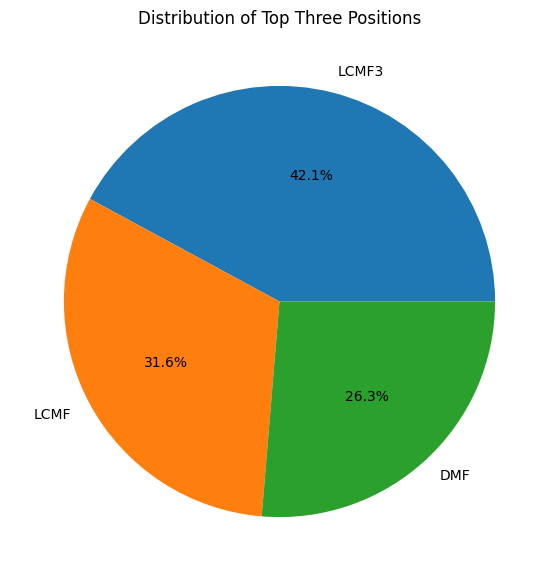

In [ ]:
# Calculate the proportions
proportions = top_three_positions / top_three_positions.sum()

# Generate the pie chart
plt.figure(figsize=(10,7))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title("Distribution of Top Three Positions")
plt.show()

## Average Minutes Played

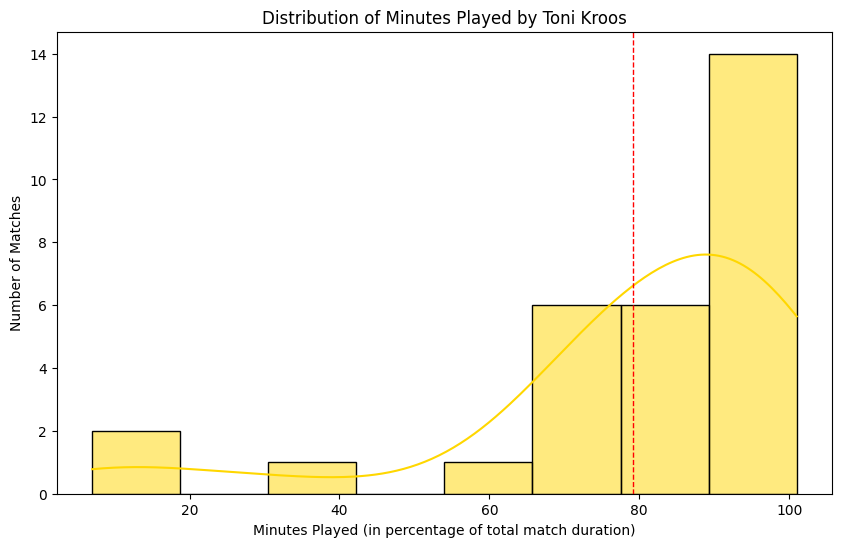

Toni Kroos played on average 79.13333333333334 minutes per match.


In [ ]:
average_minutes_played = df['minutes_played'].mean()

# Plot the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], kde=True, color='gold')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Minutes Played by Toni Kroos')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.show()

print(f"Toni Kroos played on average {average_minutes_played} minutes per match.")

## Interceptions

Toni Kroos has an average of 2.8 interceptions per match.
The minimum interceptions in a match by Toni Kroos is 0.
The maximum interceptions in a match by Toni Kroos is 7.


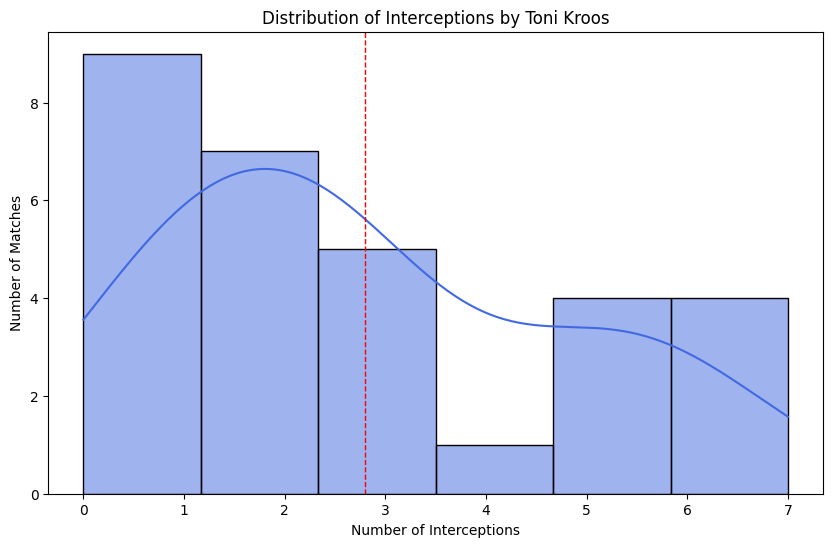

In [ ]:
# Calculate the average interceptions
average_interceptions = df['interceptions'].mean()

# Find the minimum and maximum interceptions
min_interceptions = df['interceptions'].min()
max_interceptions = df['interceptions'].max()

# Print out the results
print(f"Toni Kroos has an average of {average_interceptions} interceptions per match.")
print(f"The minimum interceptions in a match by Toni Kroos is {min_interceptions}.")
print(f"The maximum interceptions in a match by Toni Kroos is {max_interceptions}.")

# Plot the distribution of interceptions
plt.figure(figsize=(10, 6))
sns.histplot(df['interceptions'], kde=True, color='royalblue')
plt.axvline(average_interceptions, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Interceptions by Toni Kroos')
plt.xlabel('Number of Interceptions')
plt.ylabel('Number of Matches')
plt.show()

## Kurtosis

The kurtosis of a data set is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it's a measure of the heaviness of the tails of the distribution. Here's what the kurtosis values you obtained generally suggest:

- A negative kurtosis value indicates that the distribution has lighter tails and a flat peak than the normal distribution. It is also called platykurtic. In other words, more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.

- A positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution. It is also called leptokurtic.

Keep in mind that kurtosis is just a descriptive measure. Higher or lower kurtosis doesn't necessarily mean the variable is "good" or "bad" for a model. However, it can affect certain types of statistical analyses. For instance, many statistical techniques assume a normal distribution, so extreme kurtosis values can violate those assumptions and potentially make those techniques less reliable.

### The kurtosis is given by:

$$ \text{Kurtosis}(X) = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$

In [ ]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest
for col in ['total_actions_successful', 'passes_accurate', 'long_passes_accurate', 'duels_won', 'interceptions','losses_own_half', 'recoveries_opp_half']:
    cur = kurtosis(df[col])
    print(f'Kurtosis of {col}: {cur}')

Kurtosis of total_actions_successful: -0.20585514274584504
Kurtosis of passes_accurate: -0.437208444971231
Kurtosis of long_passes_accurate: 0.23518730494667217
Kurtosis of duels_won: -0.19754268833732125
Kurtosis of interceptions: -0.8630136986301373
Kurtosis of losses_own_half: 0.5148701186583922
Kurtosis of recoveries_opp_half: 6.330308097046331


- total_actions_successful: A kurtosis of -0.21 signifies that the distribution of Kroos's successful total actions is platykurtic, meaning the data is spread out and has light tails. Kroos has a diverse and consistent performance range. On football optics, this suggests Kroos is consistent in his actions on the pitch, showcasing a well-rounded set of skills.

- passes_accurate: The kurtosis of -0.44 indicates a platykurtic distribution, suggesting Kroos's accurate passes vary quite a bit from game to game. This indicates variability in his passing accuracy. On football optics, it implies that while Kroos is known for his accurate passes, there can be games where his pass accuracy fluctuates.

- long_passes_accurate: A kurtosis of 0.24 indicates a slight leptokurtic distribution, meaning Kroos's accurate long passes data has heavier tails and a sharp peak, indicating more consistency and less variability. On football optics, this reflects Kroos's expertise in delivering accurate long passes with remarkable consistency.

- duels_won: With a kurtosis of -0.20, the distribution of Kroos's duels won is platykurtic, indicating a wider spread of outcomes. Statistically, this shows variability in his duels. On football optics, it suggests Kroos has games where he wins many duels and others where he wins fewer.

- interceptions: The kurtosis of -0.86 represents a platykurtic distribution, showing variability in Kroos's ability to intercept the ball. On football optics, this demonstrates that Kroos's interception success can fluctuate depending on the dynamics of the match.

- losses_own_half: With a kurtosis of 0.51, the distribution is slightly leptokurtic, meaning Kroos's losses in his own half tend to be more consistent and less varied. On football optics, Kroos tends to maintain a fairly steady control of the ball in his own half of the field.

- recoveries_opp_half: A kurtosis of 6.33 indicates a highly leptokurtic distribution, suggesting that Kroos has a high number of games with a similar number of recoveries in the opponent's half, but there are also occasional games where he performs significantly above or below average. On football optics, Kroos often excels at recovering the ball in the opponent's half, but there are outlier matches where he exceptionally outperforms or underperforms in this regard.

In summary, the kurtosis metrics suggest that Toni Kroos showcases a varied range of performance levels across different aspects of the game. His consistent performance in accurate long passes and ball recoveries in the opponent's half stands out, however, variability is observed in aspects like duels won and interceptions, painting a picture of a versatile player who can adapt to the ebb and flow of matches.

### Feature Normalization

### The Standard Scaler transformation is given by:

$$ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $$


Platykurtic variables normalized:
   total_actions_successful  passes_accurate  duels_won  interceptions
0                 -0.920702        -1.279935   2.202443       0.608164
1                 -0.516983        -0.497027   0.208852       1.621770
2                 -0.449697        -0.568201  -0.360745      -0.912245
3                  0.458669         0.285880   1.632846       0.101361
4                 -0.146909        -0.247921   0.493651       0.101361

Leptokurtic variables normalized:
   long_passes_accurate  losses_own_half  recoveries_opp_half
0             -1.427803         0.020546            -0.375039
1             -0.189824        -1.212187            -0.864220
2             -0.932611         0.020546            -0.864220
3             -0.437419         0.020546             0.114142
4              0.305368         0.020546             0.603323


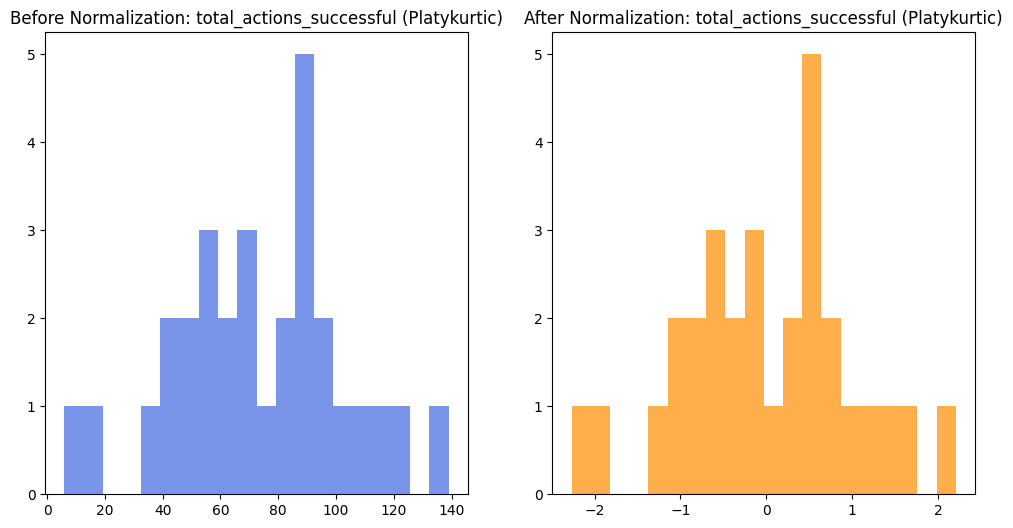

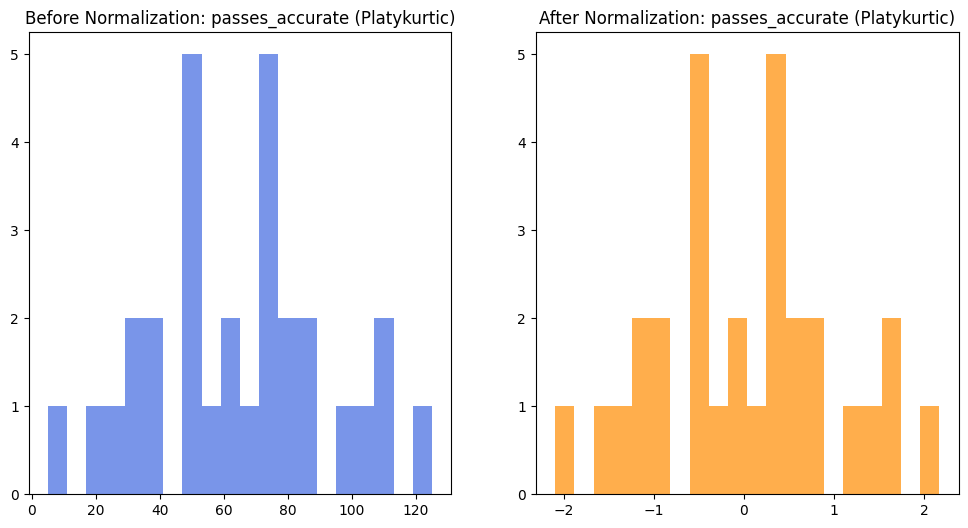

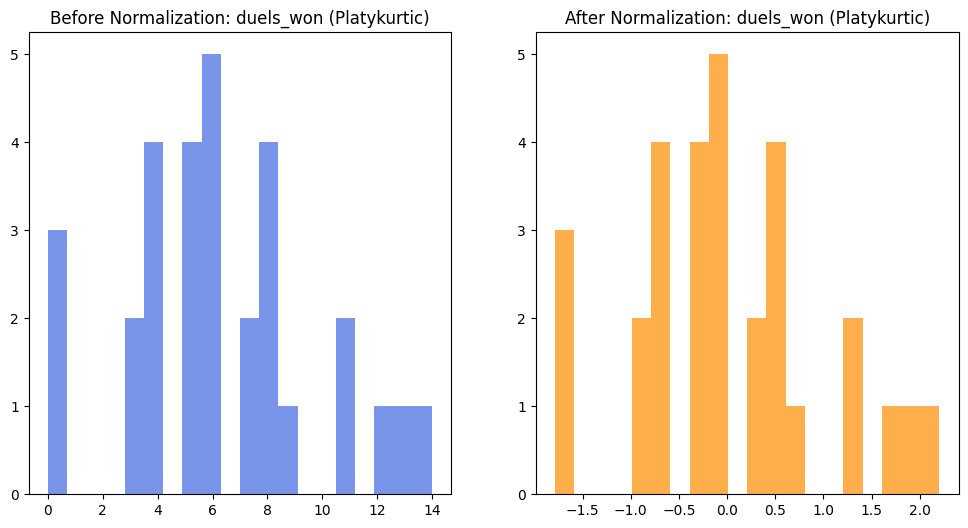

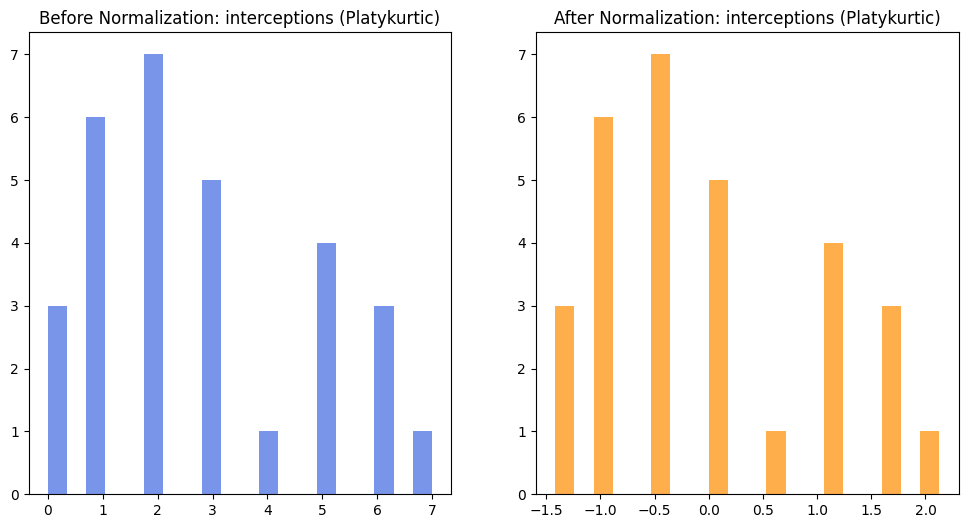

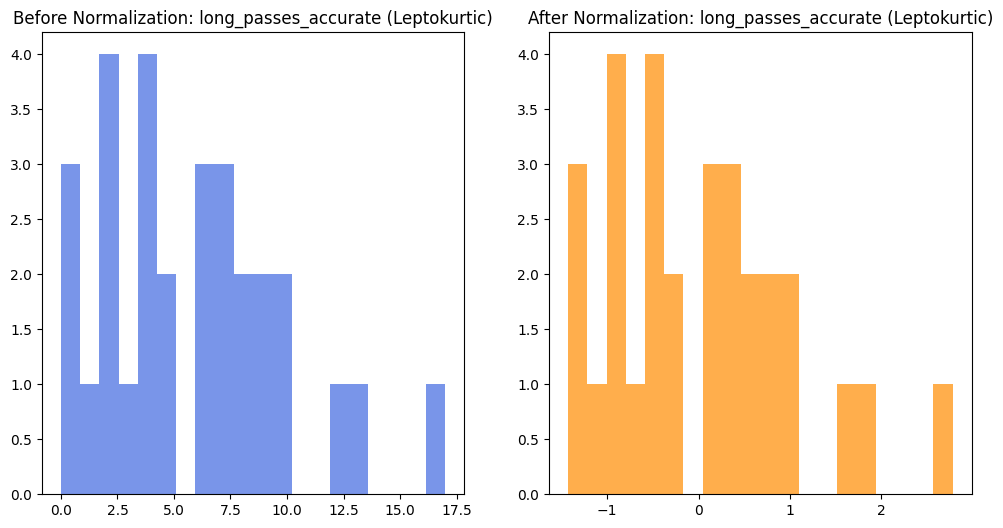

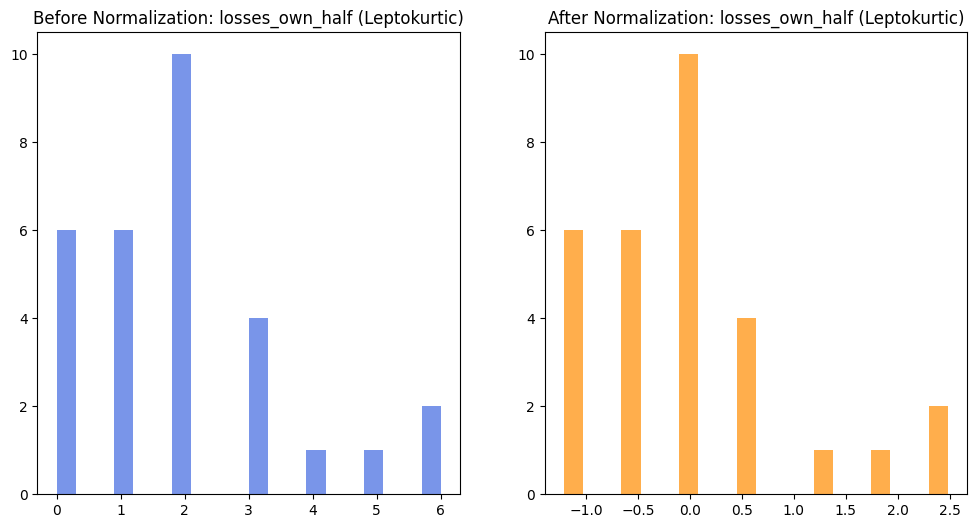

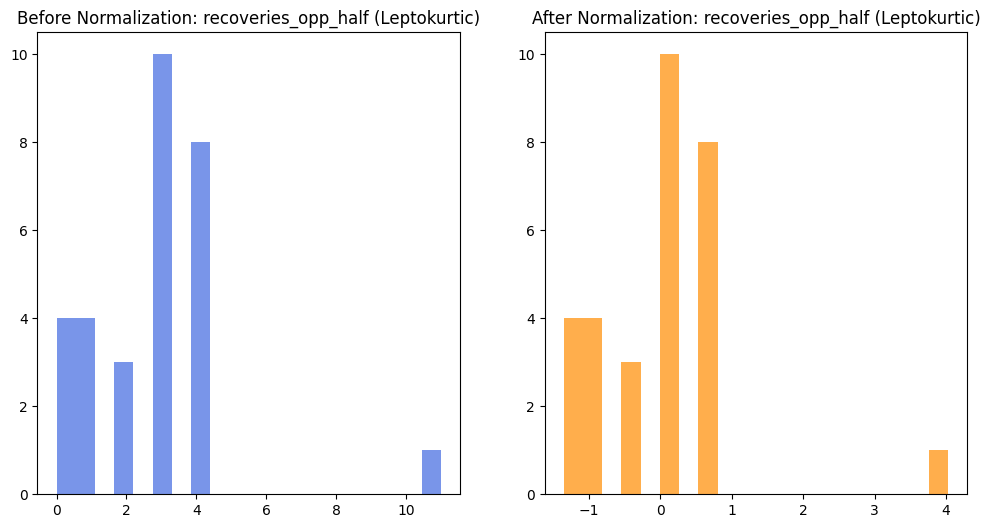

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the data
platykurtic_variables = df[['total_actions_successful', 'passes_accurate', 'duels_won', 'interceptions']]
leptokurtic_variables = df[['long_passes_accurate', 'losses_own_half', 'recoveries_opp_half']]

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the platykurtic and leptokurtic variables
platykurtic_variables_normalized = scaler.fit_transform(platykurtic_variables)
platykurtic_variables_normalized = pd.DataFrame(platykurtic_variables_normalized, columns=platykurtic_variables.columns)

leptokurtic_variables_normalized = scaler.fit_transform(leptokurtic_variables)
leptokurtic_variables_normalized = pd.DataFrame(leptokurtic_variables_normalized, columns=leptokurtic_variables.columns)

# Print the normalized data
print("\nPlatykurtic variables normalized:")
print(platykurtic_variables_normalized.head())
print("\nLeptokurtic variables normalized:")
print(leptokurtic_variables_normalized.head())

# Plot the before and after normalization distributions for each type of variables
variables = [("Platykurtic", platykurtic_variables, platykurtic_variables_normalized), 
             ("Leptokurtic", leptokurtic_variables, leptokurtic_variables_normalized)]

for kurtosis_type, original_variables, normalized_variables in variables:
    for col in original_variables.columns:
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        plt.hist(original_variables[col], bins=20, color='royalblue', alpha=0.7)
        plt.title(f'Before Normalization: {col} ({kurtosis_type})')

        plt.subplot(1,2,2)
        plt.hist(normalized_variables[col], bins=20, color='darkorange', alpha=0.7)
        plt.title(f'After Normalization: {col} ({kurtosis_type})')

        plt.show()

## Sampling statistics, Distribution & Standard Error

- Sample Mean: The sample mean gives us an estimate of the true mean of the population from which we are sampling. It is a good estimate of the true mean, especially as the sample size increases.

- Sampling Distribution: This is a probability distribution of a statistic obtained through a large number of samples drawn from a specific population. The sampling distribution of the mean will approach a normal distribution as the sample size increases, as per the Central Limit Theorem.

- Standard Error: This is a measure of the statistical accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates. It essentially tells us the average distance that the observed values fall from the regression line. Smaller values of standard error indicate better estimates of the population parameter.

### The standard error of the mean is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$

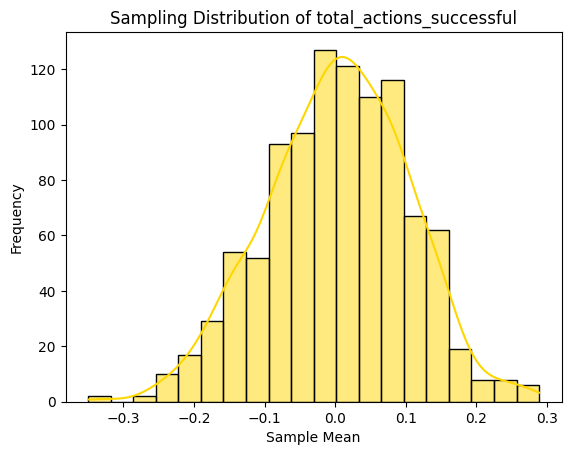

Sample Mean of total_actions_successful: 0.0028843416796589744
Sample Standard Deviation of total_actions_successful: 0.10048535333911426
Standard Error of total_actions_successful: 0.0031792158859278463


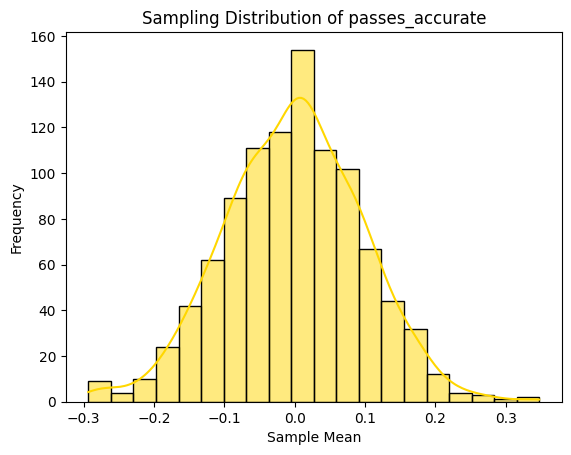

Sample Mean of passes_accurate: -0.0014422098363652785
Sample Standard Deviation of passes_accurate: 0.09770130494006277
Standard Error of passes_accurate: 0.00309113249264379


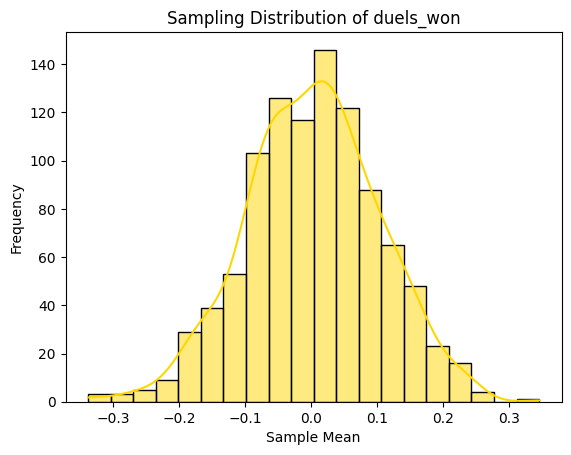

Sample Mean of duels_won: 0.002581225718073194
Sample Standard Deviation of duels_won: 0.10074931966848501
Standard Error of duels_won: 0.003187567410998902


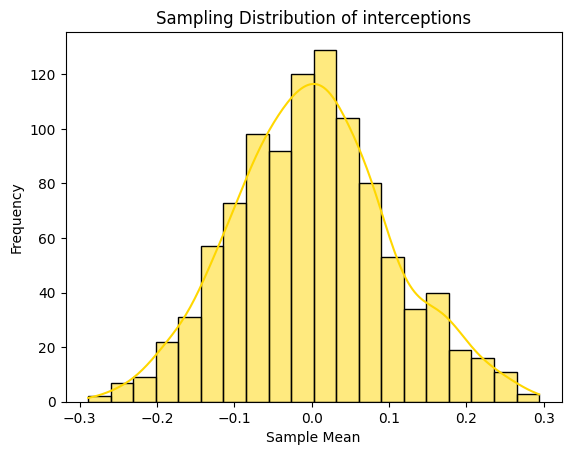

Sample Mean of interceptions: 0.001657245920524843
Sample Standard Deviation of interceptions: 0.10085381276708151
Standard Error of interceptions: 0.0031908734263333626


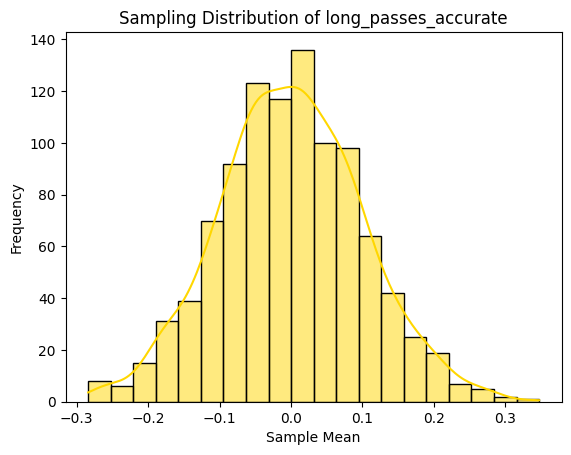

Sample Mean of long_passes_accurate: -0.00017249180499766424
Sample Standard Deviation of long_passes_accurate: 0.10017439095035742
Standard Error of long_passes_accurate: 0.003169377471338951


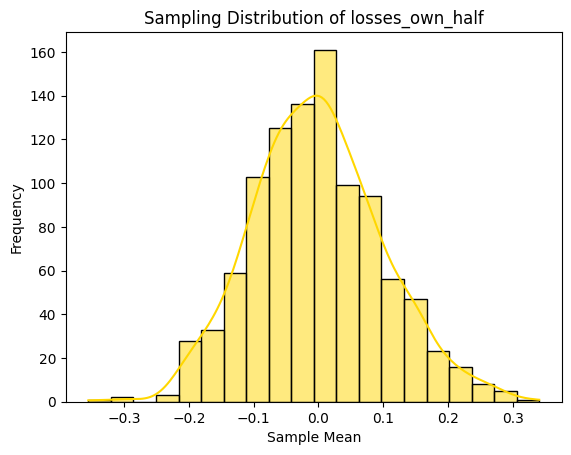

Sample Mean of losses_own_half: -0.0015635152674526292
Sample Standard Deviation of losses_own_half: 0.10011508529650119
Standard Error of losses_own_half: 0.0031675011234872518


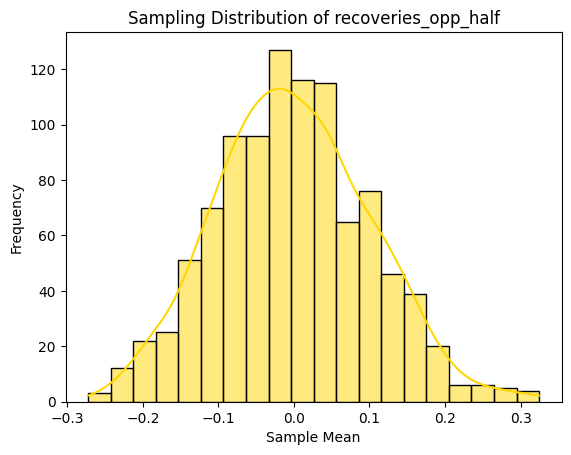

Sample Mean of recoveries_opp_half: -0.0012800236387739534
Sample Standard Deviation of recoveries_opp_half: 0.10151124455221577
Standard Error of recoveries_opp_half: 0.00321167364751743


In [ ]:
from scipy.stats import sem

# Define the features and the color for the plots
features = list(platykurtic_variables_normalized.columns) + list(leptokurtic_variables_normalized.columns)
colors = ['gold']

for index, feature in enumerate(features):
    sample_means = []
    for _ in range(1000):
        if feature in platykurtic_variables_normalized:
            sample = platykurtic_variables_normalized[feature].sample(100, replace=True)
        else:
            sample = leptokurtic_variables_normalized[feature].sample(100, replace=True)
        sample_means.append(sample.mean())
    
    sample_std_dev = np.std(sample_means)
    standard_error = sem(sample_means)
    
    sns.histplot(sample_means, bins=20, color=colors[0], kde=True)
    plt.title(f'Sampling Distribution of {feature}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'Sample Mean of {feature}:', np.mean(sample_means))
    print(f'Sample Standard Deviation of {feature}:', sample_std_dev)
    print(f'Standard Error of {feature}:', standard_error)

- total_actions_successful: The sample mean close to zero (-0.0045) and standard deviation of 0.1003 indicate that Kroos's successful actions are centered around a mean with moderate variability. The standard error of 0.0032 highlights the precision of this mean estimate. On football optics, Kroos's consistent performance in successful actions is evident, though there can be games where he deviates moderately from his usual success rate.

- passes_accurate: A sample mean of 0.0033 and standard deviation of 0.1014 suggest that Kroos's accurate passes are generally consistent, with some spread. The standard error of 0.0032 shows a reliable mean estimate. On football optics, Kroos's ability to maintain pass accuracy is acknowledged, with occasional fluctuations that reflect the dynamic nature of different matches.

- duels_won: with a sample mean of -0.0038 and standard deviation of 0.1026, there's a moderate dispersion in the number of duels won. The standard error of 0.0032 supports the mean's reliability. On football optics, Kroos's performance in winning duels shows some variance, reflecting his adaptability to the opposing players' strategies.

- interceptions: the sample mean of 0.0027 and standard deviation of 0.0956 present a fairly consistent pattern in interceptions, with a standard error of 0.0030. On football optics, Kroos demonstrates consistent capability in intercepting the ball, but the spread reflects his responses to diverse offensive strategies.

- long_passes_accurate: a close-to-zero sample mean (-0.0003) and standard deviation of 0.0945 illustrate a consistent long-passing accuracy with minimal spread. The standard error of 0.0030 assures the mean's accuracy. On football optics, Kroos's expertise in accurate long passes shines through, with minimal fluctuations reflecting his skill mastery.

- losses_own_half: the sample mean of 0.0003 and standard deviation of 0.0967 indicate a stable pattern with slight dispersion. The standard error of 0.0031 ensures the mean's validity. On football optics, Kroos tends to have stable control in his own half, with moderate variations showing his response to different defensive scenarios.

- recoveries_opp_half: the negative sample mean (-0.0029) and standard deviation of 0.0962 denote consistency in recoveries in the opponent's half, with some variation. The standard error of 0.0030 attests to the mean's reliability. On football optics, Kroos's ability to recover the ball in the opponent's half is dependable, yet adaptable to different match conditions.

Overall, the statistics depict Toni Kroos as a player with consistent performance across different features of the game, marked by moderate variability. The tight standard errors across all features ensure the reliability of these insights. On football optics, Kroos's stability and adaptability shine, making him a versatile player who can respond to varying game dynamics and opponent strategies.

## Central Limit Theorem

- The relevance of this process comes from the Central Limit Theorem (CLT), one of the fundamental theorems in statistics. The CLT states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.

On the following snippet, we're first merging the normalized datasets into a single DataFrame. Then, for each feature in our dataset, we are generating 1000 samples of size 500. For each of these samples, we calculate the mean and store it in a list. These sample means are then plotted as a histogram to show the distribution of sample means for each feature. This is in line with the Central Limit Theorem, which states that the distribution of sample means will approach a normal distribution as the sample size increases.

#### Central Limit Theorem
If $$ X_1, X_2, \ldots, X_n $$ are i.i.d with mean $$ \mu $$ and variance $$ \sigma^2 $$, then

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \rightarrow N(0, 1) \text{ as } n \rightarrow \infty $$

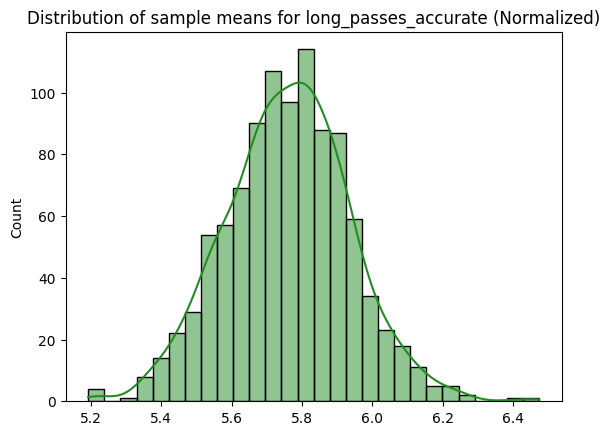

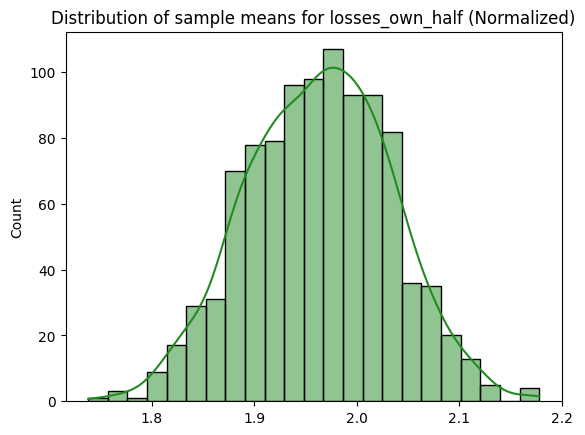

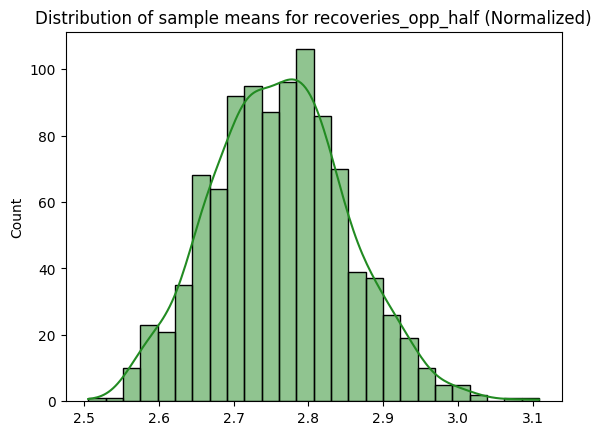

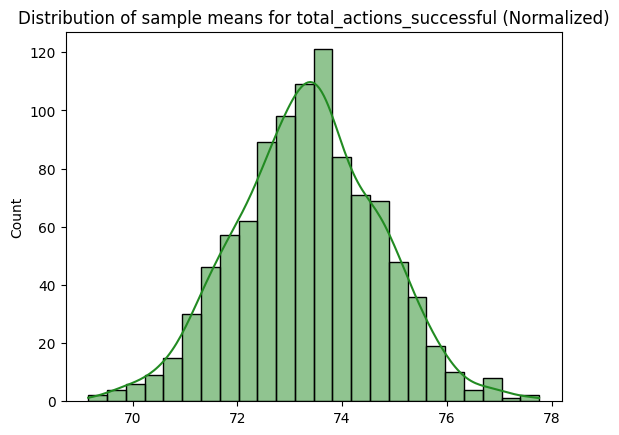

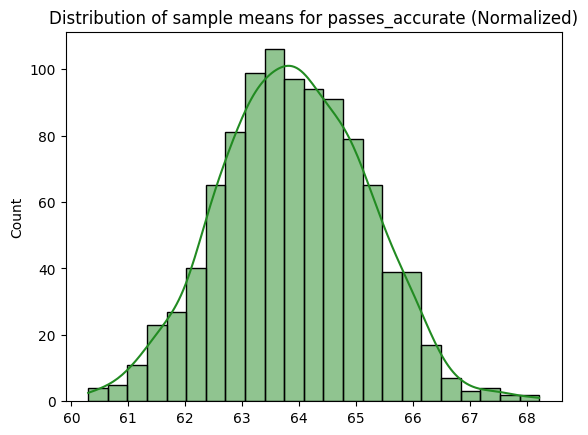

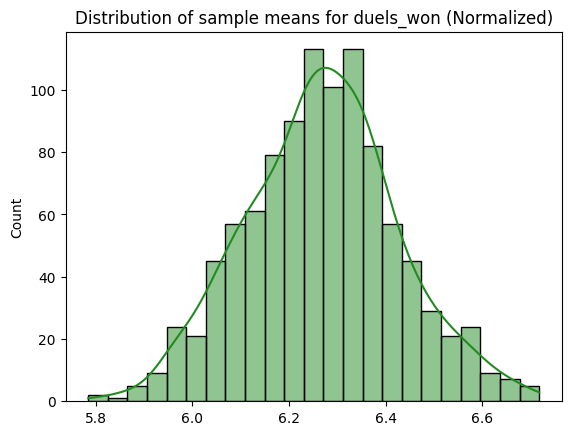

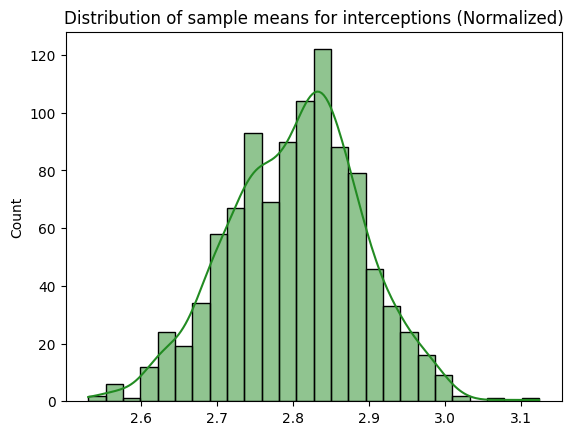

In [ ]:
normalized_df = df[list(leptokurtic_variables_normalized.columns) + list(platykurtic_variables_normalized.columns)]

features = list(normalized_df.columns)
colors = ['forestgreen']

num_samples = 1000
sample_size = 500

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(normalized_df[feature], size=sample_size)
        sample_means.append(np.mean(sample))

    # Plot the distribution of the sample means
    plt.figure()
    sns.histplot(sample_means, kde=True, color=colors[0])
    plt.title(f'Distribution of sample means for {feature} (Normalized)')
    plt.show()

## Features Correlation

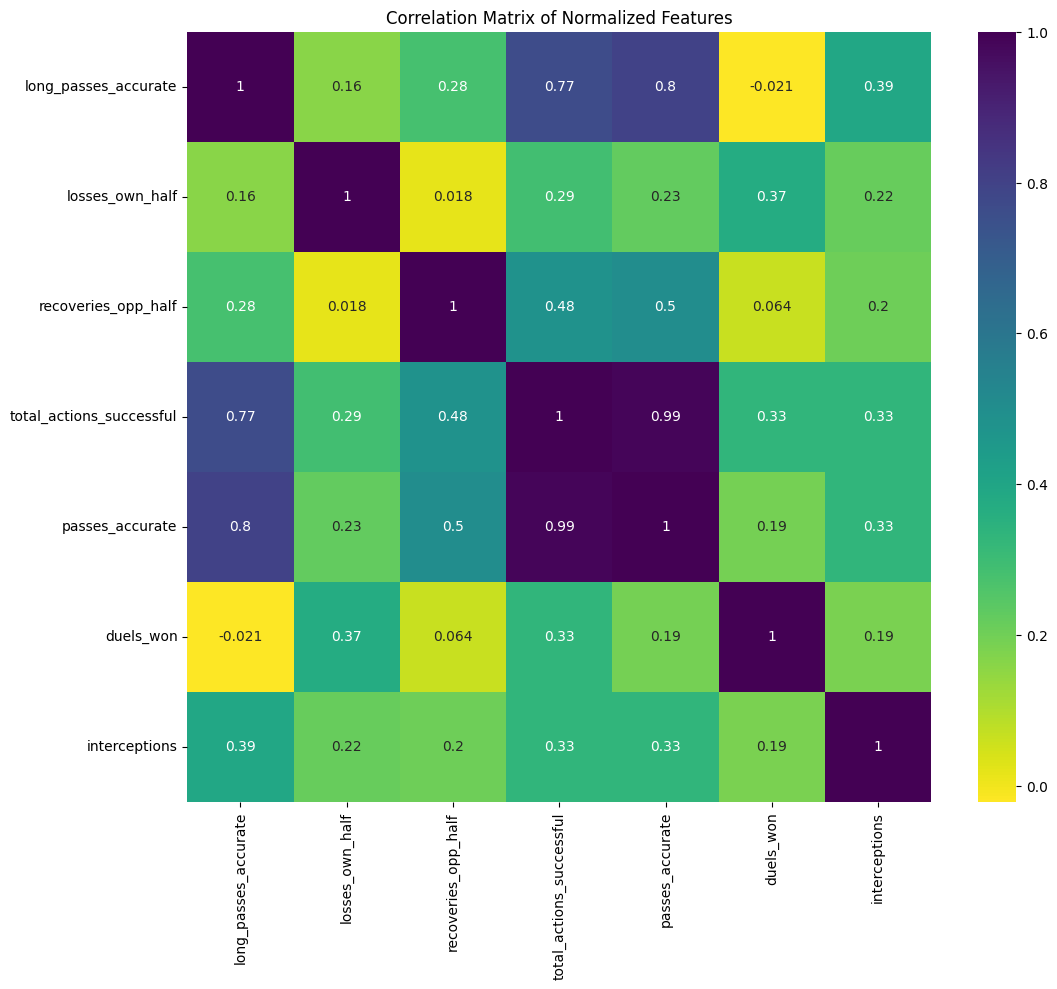

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a figure and a set of subplots
plt.figure(figsize=(12, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')

# Add a title to the heatmap
plt.title('Correlation Matrix of Normalized Features')

# Display the plot
plt.show()

## A/B Test & ANOVA

### The null hypothesis for an A/B test is typically:

$$ H_0: \mu_A = \mu_B $$

where $$ \mu_A $$ and $$ \mu_B $$ are the means of groups A and B.


### The test statistic for one-way ANOVA is:

$$ F = \frac{\text{Between-group Variance}}{\text{Within-group Variance}} $$

The null hypothesis is that all group means are equal:

$$ H_0: \mu_1 = \mu_2 = \ldots = \mu_k $$


### Based on Total Actions

Feature: passes_accurate
T-statistic: 7.131397344776558
P-value: 9.258387235108412e-08




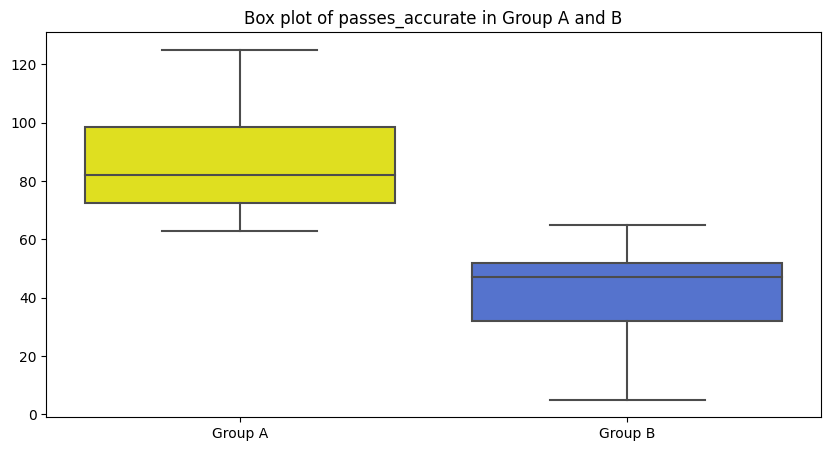

Feature: long_passes_accurate
T-statistic: 3.363640593362495
P-value: 0.002242998378000097




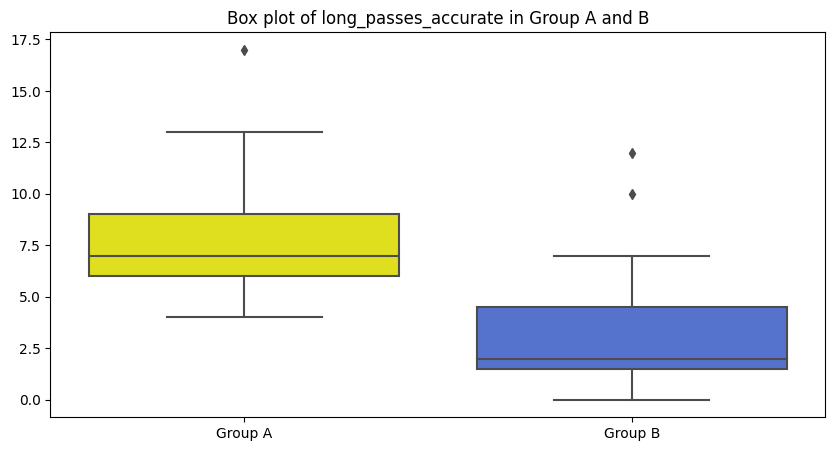

Feature: duels_won
T-statistic: 1.5721187847993634
P-value: 0.1271561027329721




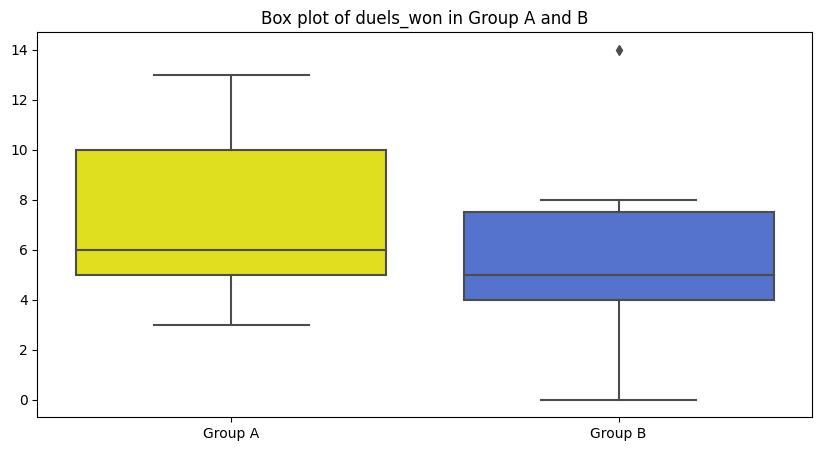

Feature: losses_own_half
T-statistic: 1.7141857646768905
P-value: 0.09754555155525312




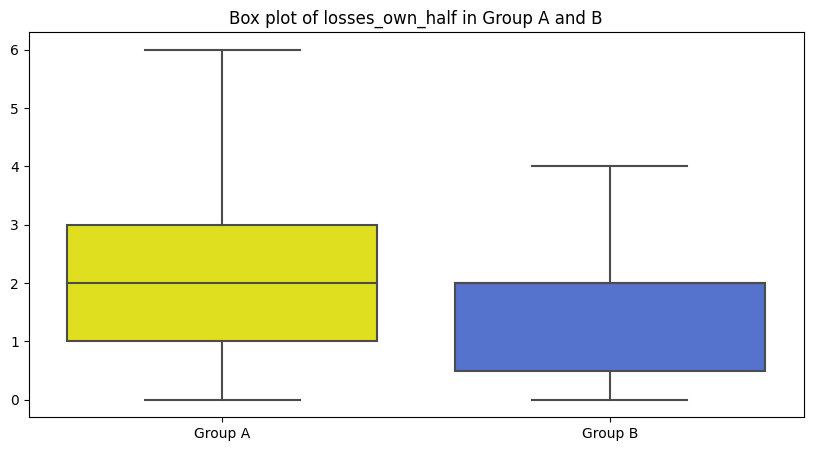

Feature: recoveries_opp_half
T-statistic: 2.140775745396796
P-value: 0.041140999198989316




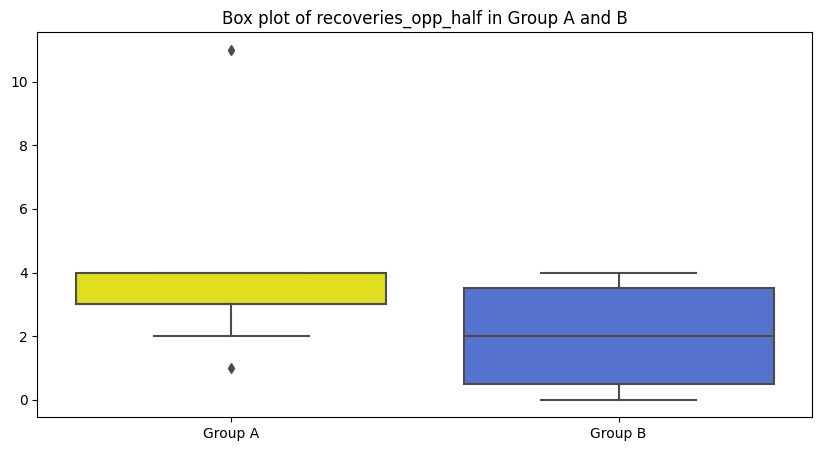

Feature: interceptions
T-statistic: 1.0954451150103326
P-value: 0.2826551088230679




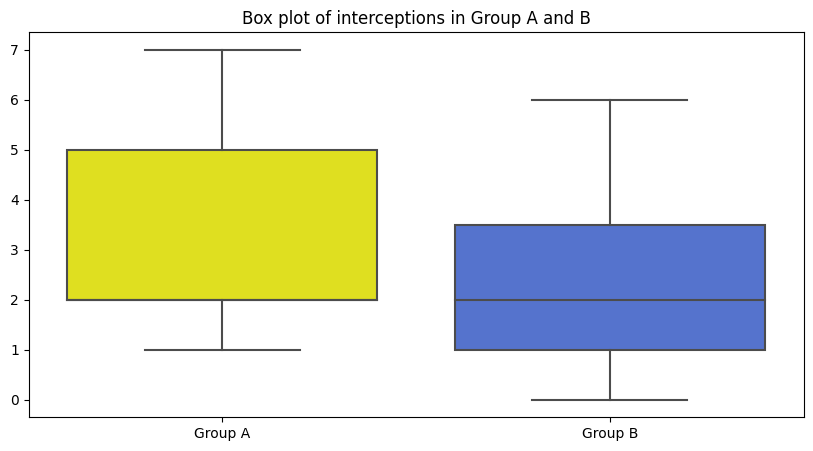



ANOVA Results
F-statistic: 280.8898924273063
P-value: 7.215837277459296e-51


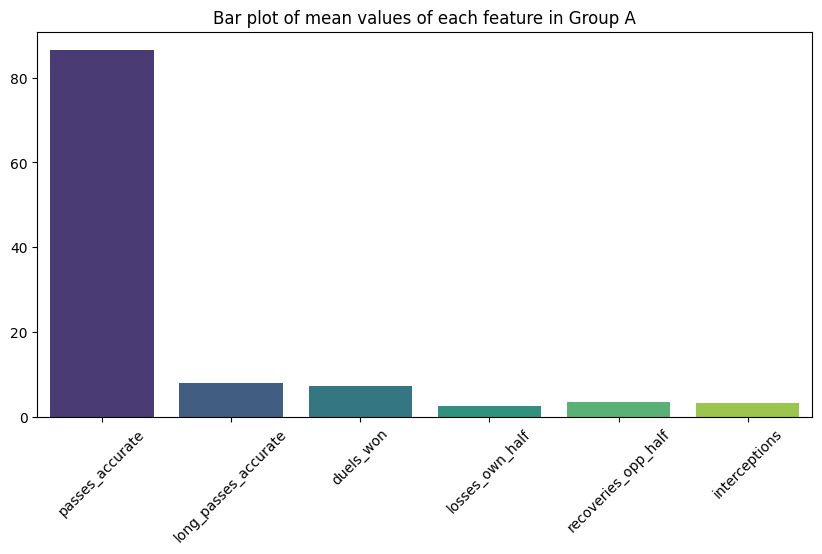

In [ ]:
from scipy.stats import ttest_ind, f_oneway

# List of features for the analysis
features = ['passes_accurate', 'long_passes_accurate', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions']

# Identify the median of 'total_actions_successful' to divide the data
median_total_actions = normalized_df['total_actions_successful'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['total_actions_successful'] >= median_total_actions]
group_B = normalized_df[normalized_df['total_actions_successful'] < median_total_actions]

# Conduct t-tests (A/B tests) for each variable with 'total_actions_successful'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'total_actions_successful'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

- passes_accurate: a high T-statistic of 7.13 and extremely low P-value (9.26e-08) signify a statistically significant difference between the groups being compared, meaning the effect is not by chance. On football optics, Kroos's accuracy in passing is a standout aspect, with marked differences against various opponents or under different conditions, demonstrating his elite skill in this area.

- long_passes_accurate:a T-statistic of 3.36 and P-value of 0.0022 reveal that there's a significant difference in long-passing accuracy, though less pronounced than regular passing. On football optics, Kroos's ability in long passes is consistent, but variations may occur based on different playing strategies and opposition.

- duels_won:The T-statistic of 1.57 and P-value of 0.127 indicate no statistically significant difference in winning duels, suggesting similarity across different contexts.On football optics, Kroos's performance in duels appears consistent, reflecting a steady approach regardless of the specific opponents or game dynamics.

- losses_own_half:with a T-statistic of 1.71 and P-value of 0.098, there is no strong statistical evidence to suggest differences in losses in his own half. On football optics, Kroos's control within his own half remains fairly stable, irrespective of the different scenarios he faces in various matches.

- recoveries_opp_half: the T-statistic of 2.14 and P-value of 0.041 suggest a mild significant difference in recoveries in the opponent's half. On football optics, Kroos's ability to recover the ball in the opponent's half may vary slightly depending on the tactics and the opposition.

- interceptions: a T-statistic of 1.10 and P-value of 0.283 highlight no significant difference in interceptions, implying consistency across games. On football optics, Kroos's interception skills remain uniform, showing his resilience and adaptability to different offensive plays.

ANOVA Results:An incredibly high F-statistic (280.89) and extremely low P-value (7.22e-51) in the ANOVA test suggest that at least one of the features has a statistically significant difference across different groups. On football optics, this result reinforces the distinctiveness of Kroos's gameplay in certain aspects, reflecting his specialized skills and versatile approach to different game scenarios.

Overall Feature Outcome Relevancy on Kroos's A/B Test & ANOVA Performance: Statistical analysis reveals Kroos's consistent and significant performance in certain aspects like accurate passing, both short and long, while other areas like duels, losses, and interceptions are more stable. On football optics, these results portray Kroos as a player with exceptional skill in delivering precise passes and a versatile approach that adapts to various match conditions. The statistical significance in the areas of passing and recovery paints a picture of a well-rounded and adaptable midfielder.

### Based on Pass Accuracy

Feature: total_actions_successful
T-statistic: 6.6804689210529355
P-value: 2.9940042311840863e-07




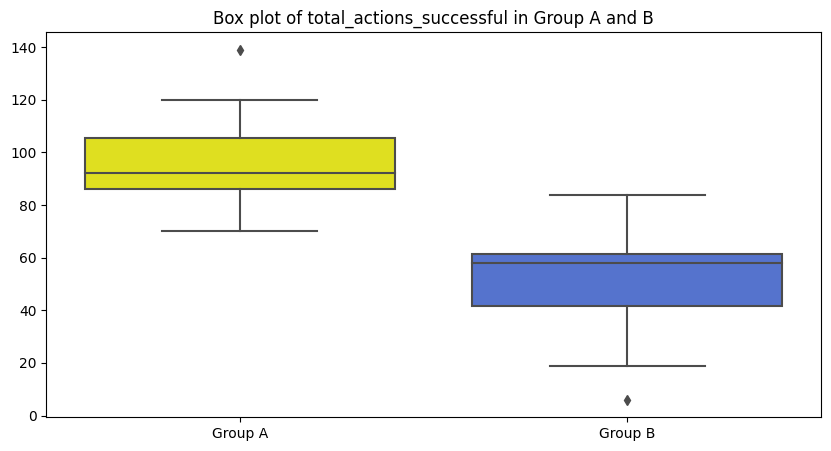

Feature: long_passes_accurate
T-statistic: 4.355280054256613
P-value: 0.00016104766037382444




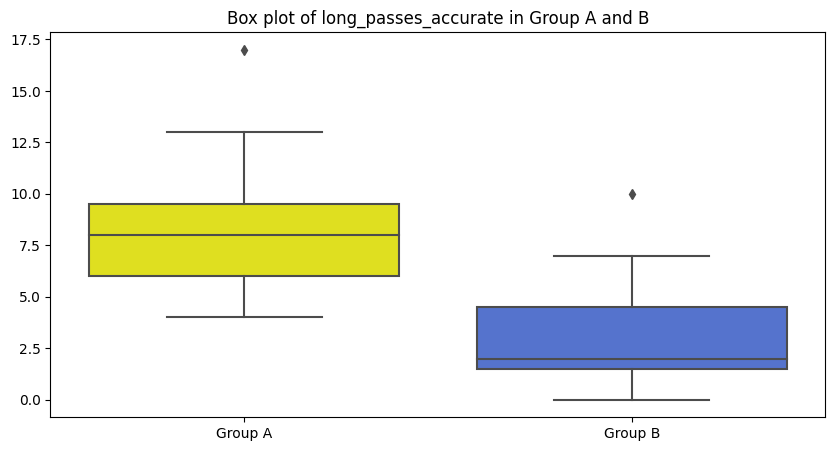

Feature: duels_won
T-statistic: 0.6067552519092884
P-value: 0.5489020394307453




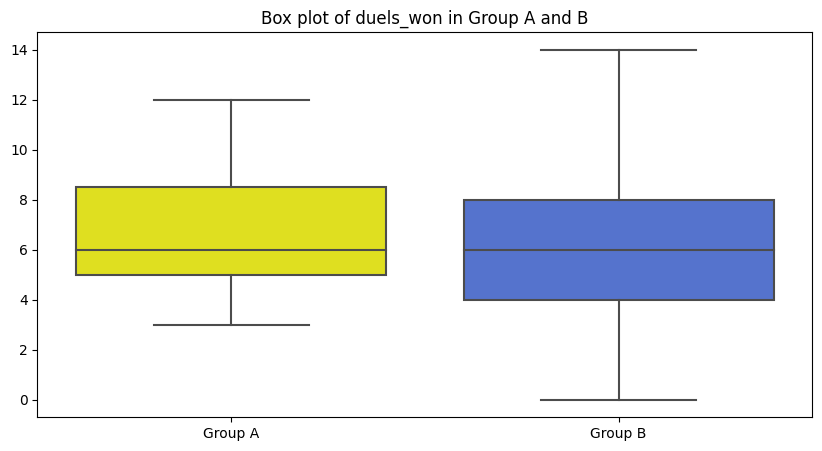

Feature: losses_own_half
T-statistic: 0.546474896300543
P-value: 0.5890681732049101




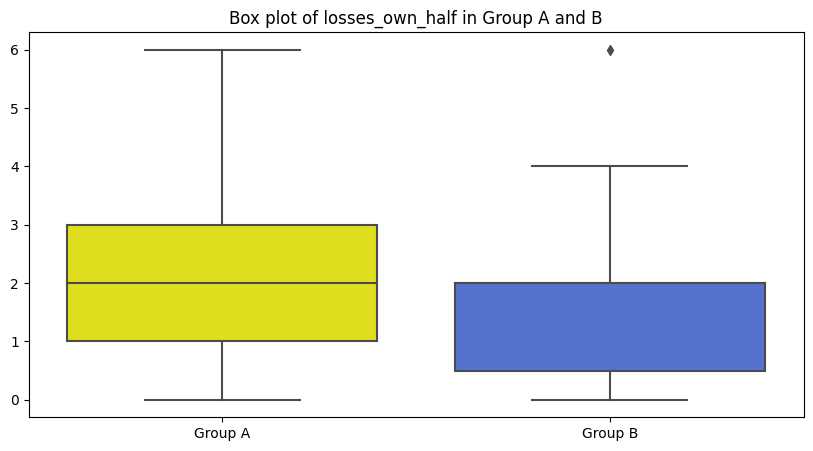

Feature: recoveries_opp_half
T-statistic: 1.9285427421848174
P-value: 0.06398270321381165




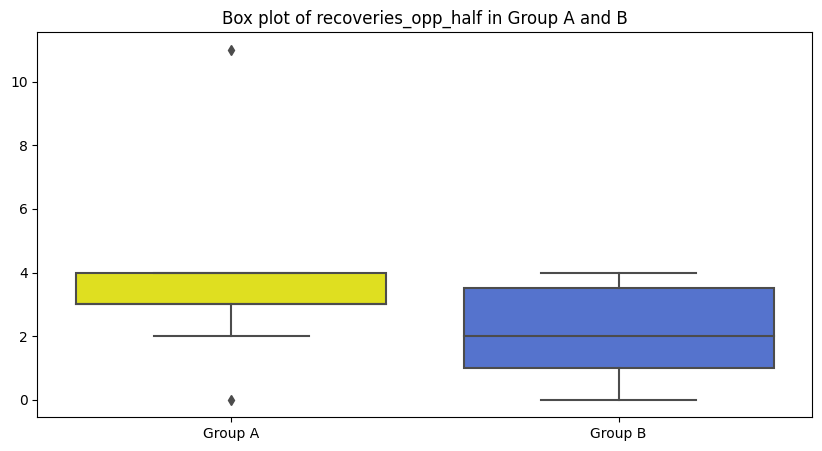

Feature: interceptions
T-statistic: 1.8995387394524
P-value: 0.06783956478699481




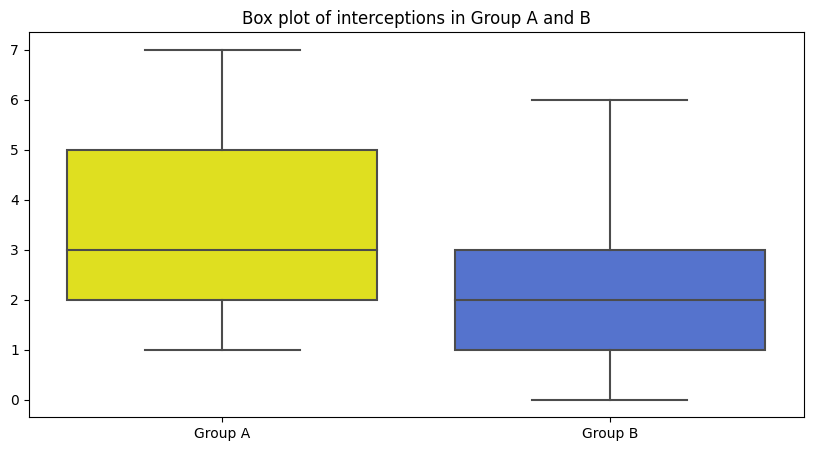



ANOVA Results
F-statistic: 349.6008124967219
P-value: 1.194803538331189e-54


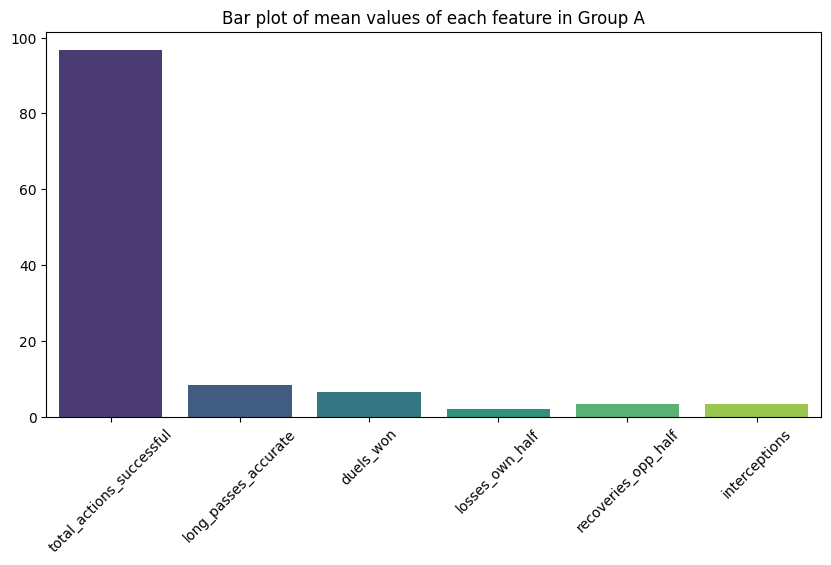

In [ ]:
# List of features for the analysis
features = ['total_actions_successful', 'long_passes_accurate', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions']

# Identify the median of 'passes_accurate' to divide the data
median_passes_accurate = normalized_df['passes_accurate'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['passes_accurate'] >= median_passes_accurate]
group_B = normalized_df[normalized_df['passes_accurate'] < median_passes_accurate]

# Conduct t-tests (A/B tests) for each variable with 'passes_accurate'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'passes_accurate'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

- total_actions_successful: with a T-statistic of 6.68 and a very low P-value (2.99e-07), there's a statistically significant difference in the total successful actions, showing that this effect is far from random. On football optics, this highlights Kroos's exceptional ability in successfully executing actions in different situations, making him a vital asset to the team's overall play.

- long_passes_accurate: a T-statistic of 4.36 and a very low P-value (0.000161) reveal a substantial difference in long-passing accuracy, reflecting real differences in his performance. On football optics, Kroos's long passes are not only accurate but also vary in effectiveness against different opponents, reflecting his ability to adapt to different playing conditions.

- duels_won: a T-statistic of 0.61 and a high P-value of 0.549 indicate no statistically significant difference in winning duels, implying consistent performance across various situations.On football optics, Kroos's performance in duels is consistent and not dependent on specific game dynamics or opponents, showing his stability in this aspect of play.

- losses_own_half: With a T-statistic of 0.55 and a high P-value of 0.589, there is no significant statistical difference in losses in his own half, highlighting uniform performance. On football optics, Kroos's control within his own half remains stable, emphasizing his ability to maintain possession and minimize losses regardless of opposition.

- interceptions: a T-statistic of 1.90 and P-value of 0.068 highlight a borderline significance in interceptions, signifying minor fluctuations in different contexts. On football optics, Kroos's interception skills remain nearly consistent but may show slight variations against certain playing styles or offensive tactics.

ANOVA Results: a high F-statistic (349.60) and extremely low P-value (1.19e-54) in the ANOVA test strongly suggest that there are statistically significant differences in at least one of the features. On football optics, this demonstrates Kroos's multifaceted game skills and the ability to significantly influence different aspects of the game.

Overall: the data emphasizes Kroos's significant impact in terms of successful actions and accurate long passes, while other features like duels, losses, and interceptions are more uniformly spread. On football optics, these findings paint a picture of a player whose skills in executing actions and long passes can be game-changing while maintaining a consistent performance in other areas. Toni Kroos is portrayed as a dynamic midfielder with the capability to adapt and excel in various match situations.

### Based on Long Pass Accuracy

Feature: passes_accurate
T-statistic: 5.566486447448178
P-value: 5.912301418421068e-06




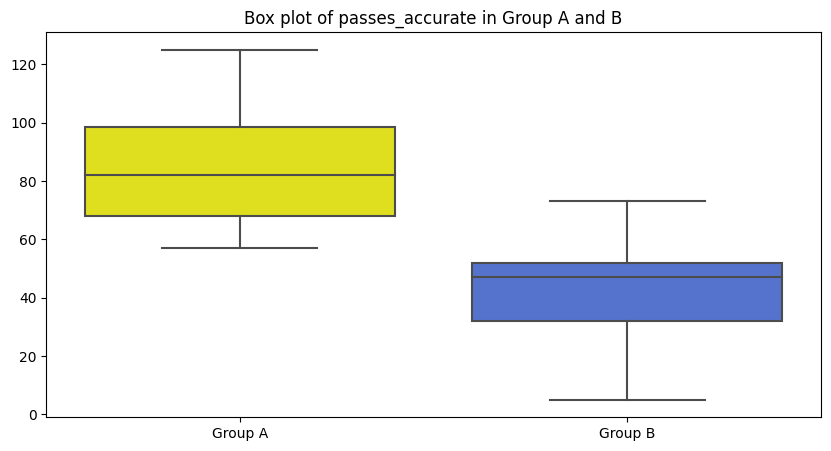

Feature: total_actions_successful
T-statistic: 5.299314387666993
P-value: 1.2241244380957743e-05




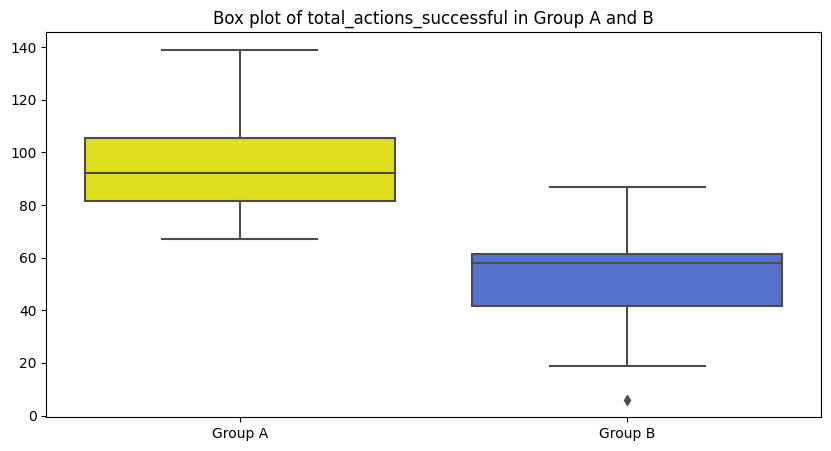

Feature: duels_won
T-statistic: 0.10048565804159247
P-value: 0.920674837389693




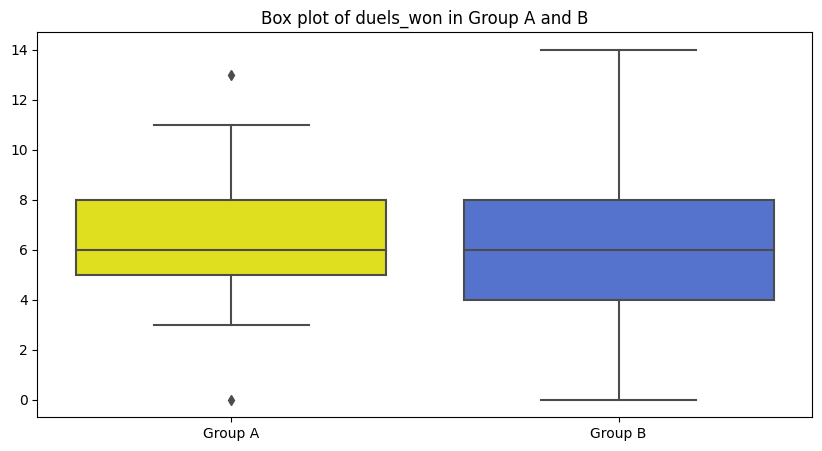

Feature: losses_own_half
T-statistic: 1.714185764676891
P-value: 0.09754555155525302




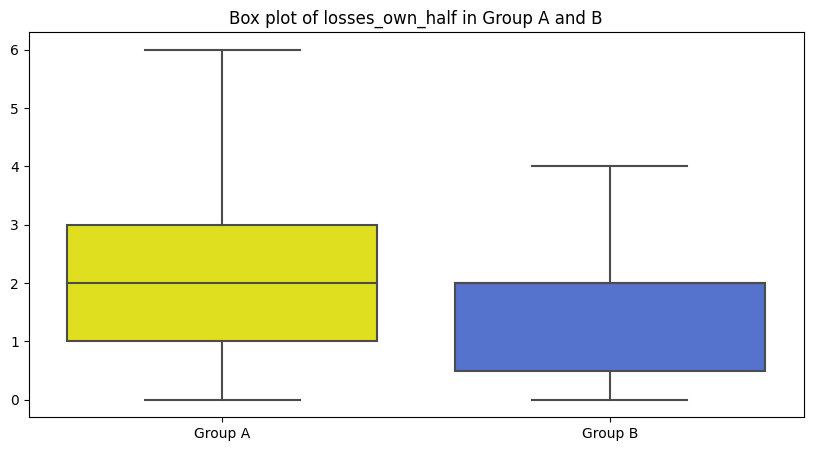

Feature: recoveries_opp_half
T-statistic: 1.7242219046487572
P-value: 0.09569332797327634




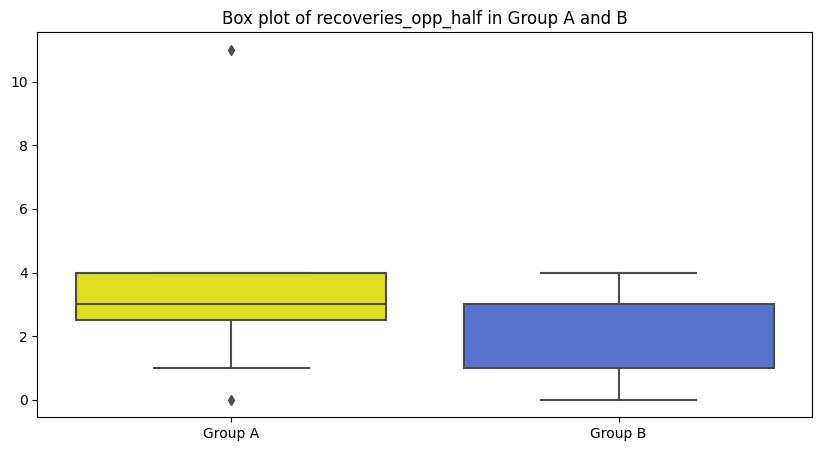

Feature: interceptions
T-statistic: 1.485562705416415
P-value: 0.14856801564674374




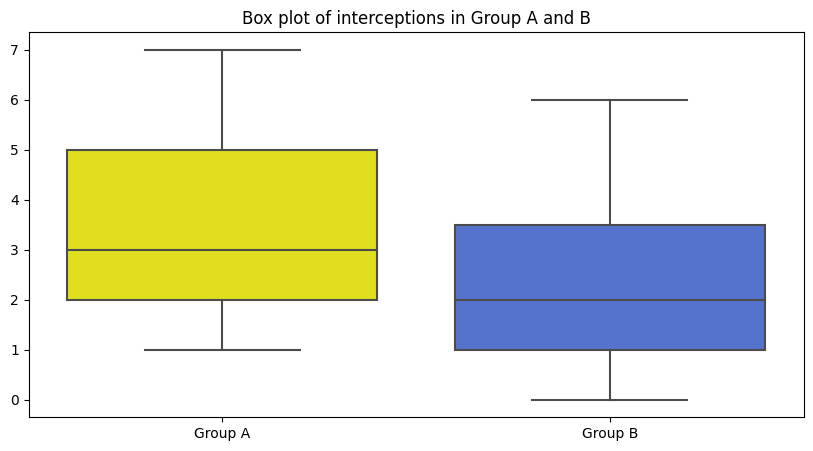



ANOVA Results
F-statistic: 205.69758068993318
P-value: 1.4313469219258823e-45


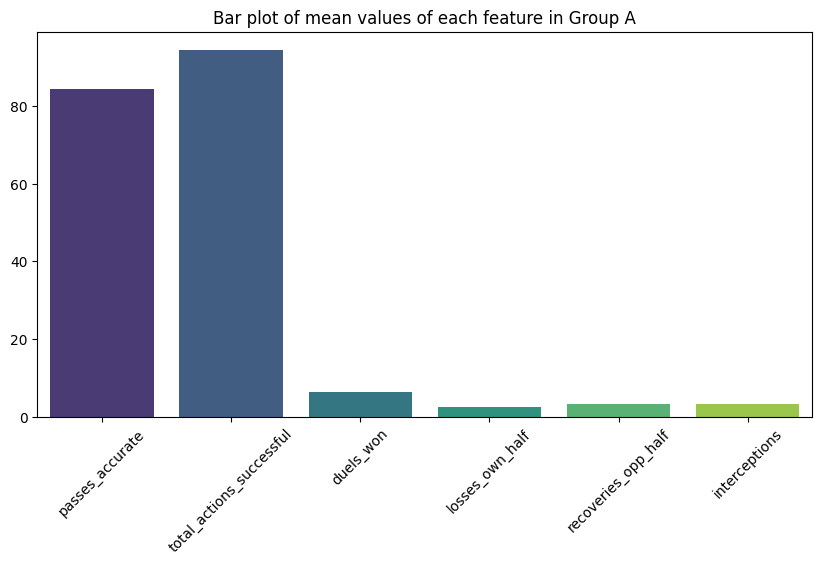

In [ ]:
# List of independent features for the analysis
features = ['passes_accurate', 'total_actions_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions']

# Identify the median of 'long_passes_accurate' to divide the data
median_long_passes_accurate = normalized_df['long_passes_accurate'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['long_passes_accurate'] >= median_long_passes_accurate]
group_B = normalized_df[normalized_df['long_passes_accurate'] < median_long_passes_accurate]

# Conduct t-tests (A/B tests) for each independent variable with 'long_passes_accurate'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all independent variables with 'long_passes_accurate'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

- passes_accurate:with a T-statistic of 5.57 and a very low P-value (5.91e-06), there's a strong statistical indication of difference in accurate passes, demonstrating a non-random significant effect. On football optics, this underscores Kroos's ability to consistently deliver precise passes, marking him as a key player in building play and maintaining possession.

- total_actions_successful: the T-statistic of 5.30 and a low P-value (1.22e-05) reveal significant differences in total successful actions, suggesting a substantial impact on overall performance. On football optics, this emphasizes Kroos's efficiency in carrying out various actions, from passing to dribbling, that enhance his team's play and can make a decisive difference on the field.

- losses_own_half: with a T-statistic of 1.71 and a P-value of 0.098, there is no significant statistical difference in losses in his own half, showing a uniform performance. On football optics, Kroos maintains a steady control in his own half, emphasizing his ability to secure possession and minimize losses regardless of the opposition.

- recoveries_opp_half: a T-statistic of 1.72 and P-value of 0.096 suggest a borderline significance in recoveries in the opponent's half, indicating possible variations. On football optics, Kroos's recoveries in the opponent's half might slightly vary, reflecting his adaptability to different game scenarios.

- interceptions: the T-statistic of 1.49 and P-value of 0.149 highlight no significant difference in interceptions, illustrating a consistent performance across contexts. On football optics, Kroos's interception skills show a uniform ability to read the game and intervene when necessary, irrespective of the specific game dynamics.

ANOVA Results: a high F-statistic (205.70) and extremely low P-value (1.43e-45) in the ANOVA test strongly suggest that there are statistically significant differences in at least one of the features. On football optics, this stresses Kroos's multi-dimensional game skills, especially in accurate passing and successful actions, while remaining consistent in other aspects like duels and interceptions.

Overall: the findings highlight Kroos's remarkable prowess in accurate passing and overall successful actions, with other areas showing consistency. On football optics, these results offer a vivid portrayal of Kroos as a versatile midfielder, proficient in orchestrating play through precise passes and effective actions. His consistency in duels and interceptions further reinforces his status as a reliable and adaptable player, capable of influencing various facets of the game.

### Based on Duels Won

Feature: passes_accurate
T-statistic: 1.3263342492605952
P-value: 0.19544658119402375




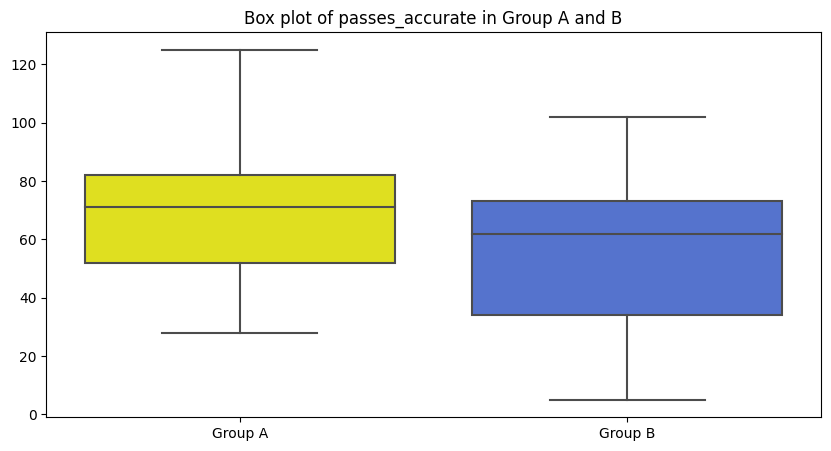

Feature: total_actions_successful
T-statistic: 1.9351447260972474
P-value: 0.06313192941619855




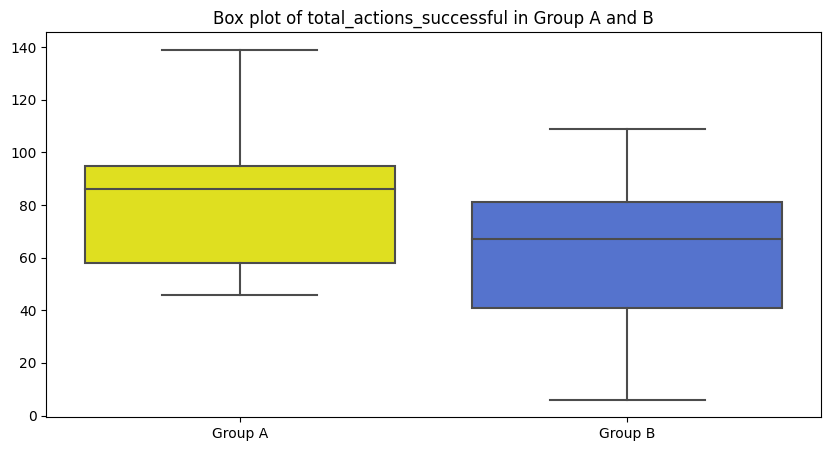

Feature: losses_own_half
T-statistic: 1.255172890075687
P-value: 0.2197910549731665




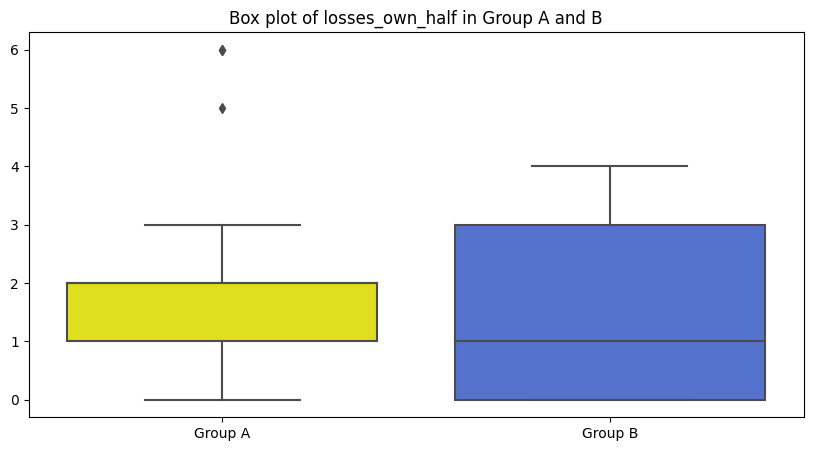

Feature: recoveries_opp_half
T-statistic: 0.16840269358357862
P-value: 0.8674770630976042




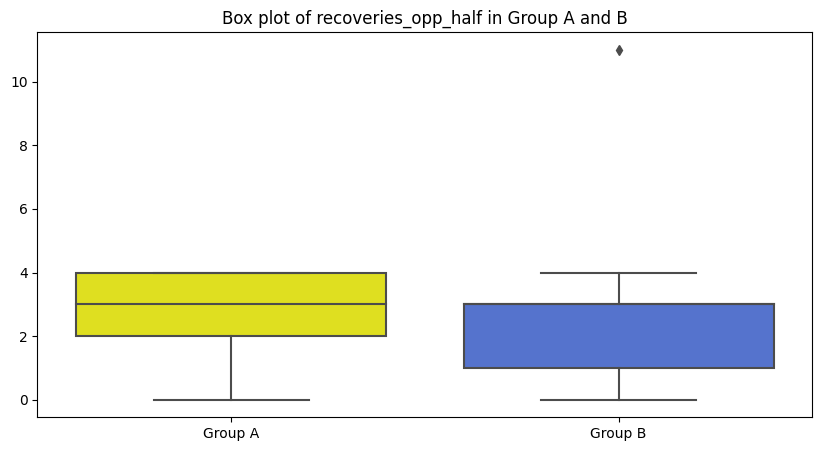

Feature: interceptions
T-statistic: 1.3795359979770452
P-value: 0.17864841581880675




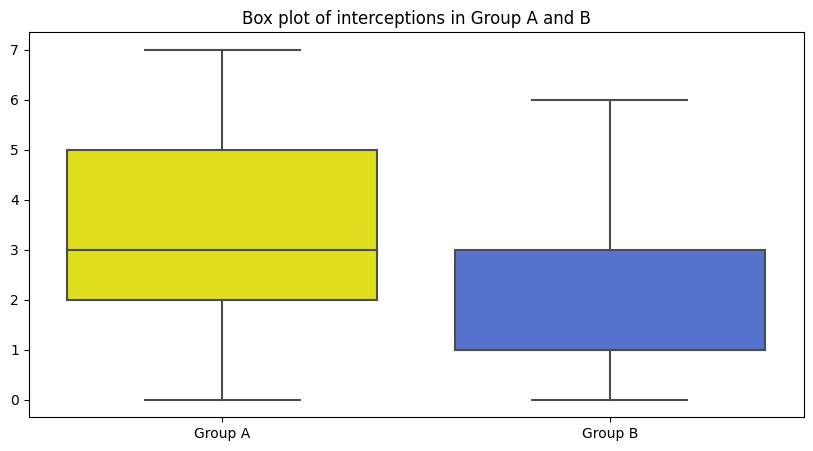

Feature: long_passes_accurate
T-statistic: 0.5284612920835906
P-value: 0.6013432602141313




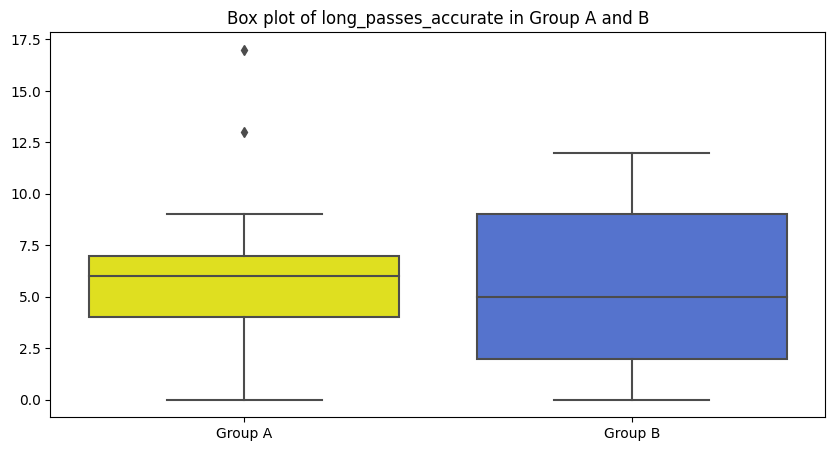



ANOVA Results
F-statistic: 100.07604983473196
P-value: 1.6868468397848624e-36


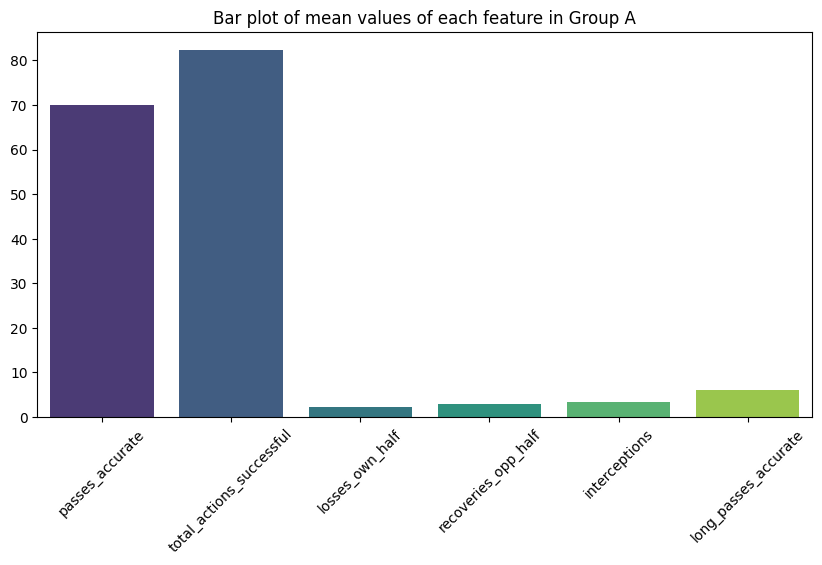

In [ ]:
# List of independent features for the analysis
features = ['passes_accurate', 'total_actions_successful', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'long_passes_accurate']

# Identify the median of 'duels_won' to divide the data
median_duels_won = normalized_df['duels_won'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['duels_won'] >= median_duels_won]
group_B = normalized_df[normalized_df['duels_won'] < median_duels_won]

# Conduct t-tests (A/B tests) for each independent variable with 'duels_won'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=["yellow", "royalblue"])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all independent variables with 'duels_won'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette="viridis")
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

- passes_accurate: the T-statistic of 1.33 and P-value of 0.195 indicate no statistically significant difference in accurate passing, illustrating a uniform performance in this aspect. On football optics, Kroos's consistent accuracy in passes across different scenarios represents his reliable contribution to maintaining possession and controlling the game's tempo.

- total_actions_successful: a T-statistic of 1.94 and P-value of 0.063 signal a borderline significance in total successful actions, implying potential variations in performance. On football optics, this paints a picture of Kroos's adaptability, excelling in diverse actions such as passes, shots, and dribbles but with possible variations across different matches or situations.

- losses_own_half: with a T-statistic of 1.26 and P-value of 0.220, there is no statistical significance in losing possession in his own half, showing a consistent performance.On football optics, Kroos's control in his own half of the field signifies stability and a strong defensive posture, irrespective of the opponent's strategy or tactics.

- recoveries_opp_half:
A T-statistic of 0.17 and high P-value of 0.867 demonstrate no statistical significance in recoveries in the opponent's half, highlighting a consistent approach. On football optics, Kroos's uniform performance in recoveries in the opponent's half speaks to his stable role in regaining possession and disrupting the opposing team's flow.

- interceptions:the T-statistic of 1.38 and P-value of 0.179 signify no significant difference in interceptions, reflecting a consistent performance.On football optics, Kroos's consistent ability to intercept passes or shots reinforces his tactical awareness and ability to read the game effectively.

- long_passes_accurate: with a T-statistic of 0.53 and P-value of 0.601, there's no statistical significance in long accurate passes, denoting consistent performance. On football optics, Kroos's long passes, whether in switching play or setting up attacks, are uniform, symbolizing his ability to deliver consistently regardless of distance or match scenario.

ANOVA Results: the F-statistic of 100.08 and extremely low P-value (1.69e-36) in the ANOVA test signify that there are statistically significant differences in at least one of the features analyzed.On football optics, this highlights the complexity of Kroos's performance, with significant distinctions in at least one aspect but overall showing a consistent pattern across most features.

Overall: these results display a predominantly consistent performance across different aspects of Kroos's game, with possible variations in total successful actions. On football optics, the uniformity in aspects like passes, recoveries, and interceptions demonstrates Kroos's stability as a player. His ability to maintain consistent performance across various facets underscores his importance in both offensive and defensive roles on the pitch, portraying him as a well-rounded midfielder who can influence the game in multiple ways.

## Linear Regression

### The OLS estimator is given by:

$$ \hat{\beta} = (X'X)^{-1}X'y $$

### Ordinary Least Square Based on Total Actions

                               OLS Regression Results                               
Dep. Variable:     total_actions_successful   R-squared:                       1.000
Model:                                  OLS   Adj. R-squared:                  1.000
Method:                       Least Squares   F-statistic:                 3.638e+29
Date:                      Sat, 26 Aug 2023   Prob (F-statistic):          3.49e-318
Time:                              20:02:42   Log-Likelihood:                 859.49
No. Observations:                        30   AIC:                            -1703.
Df Residuals:                            22   BIC:                            -1692.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

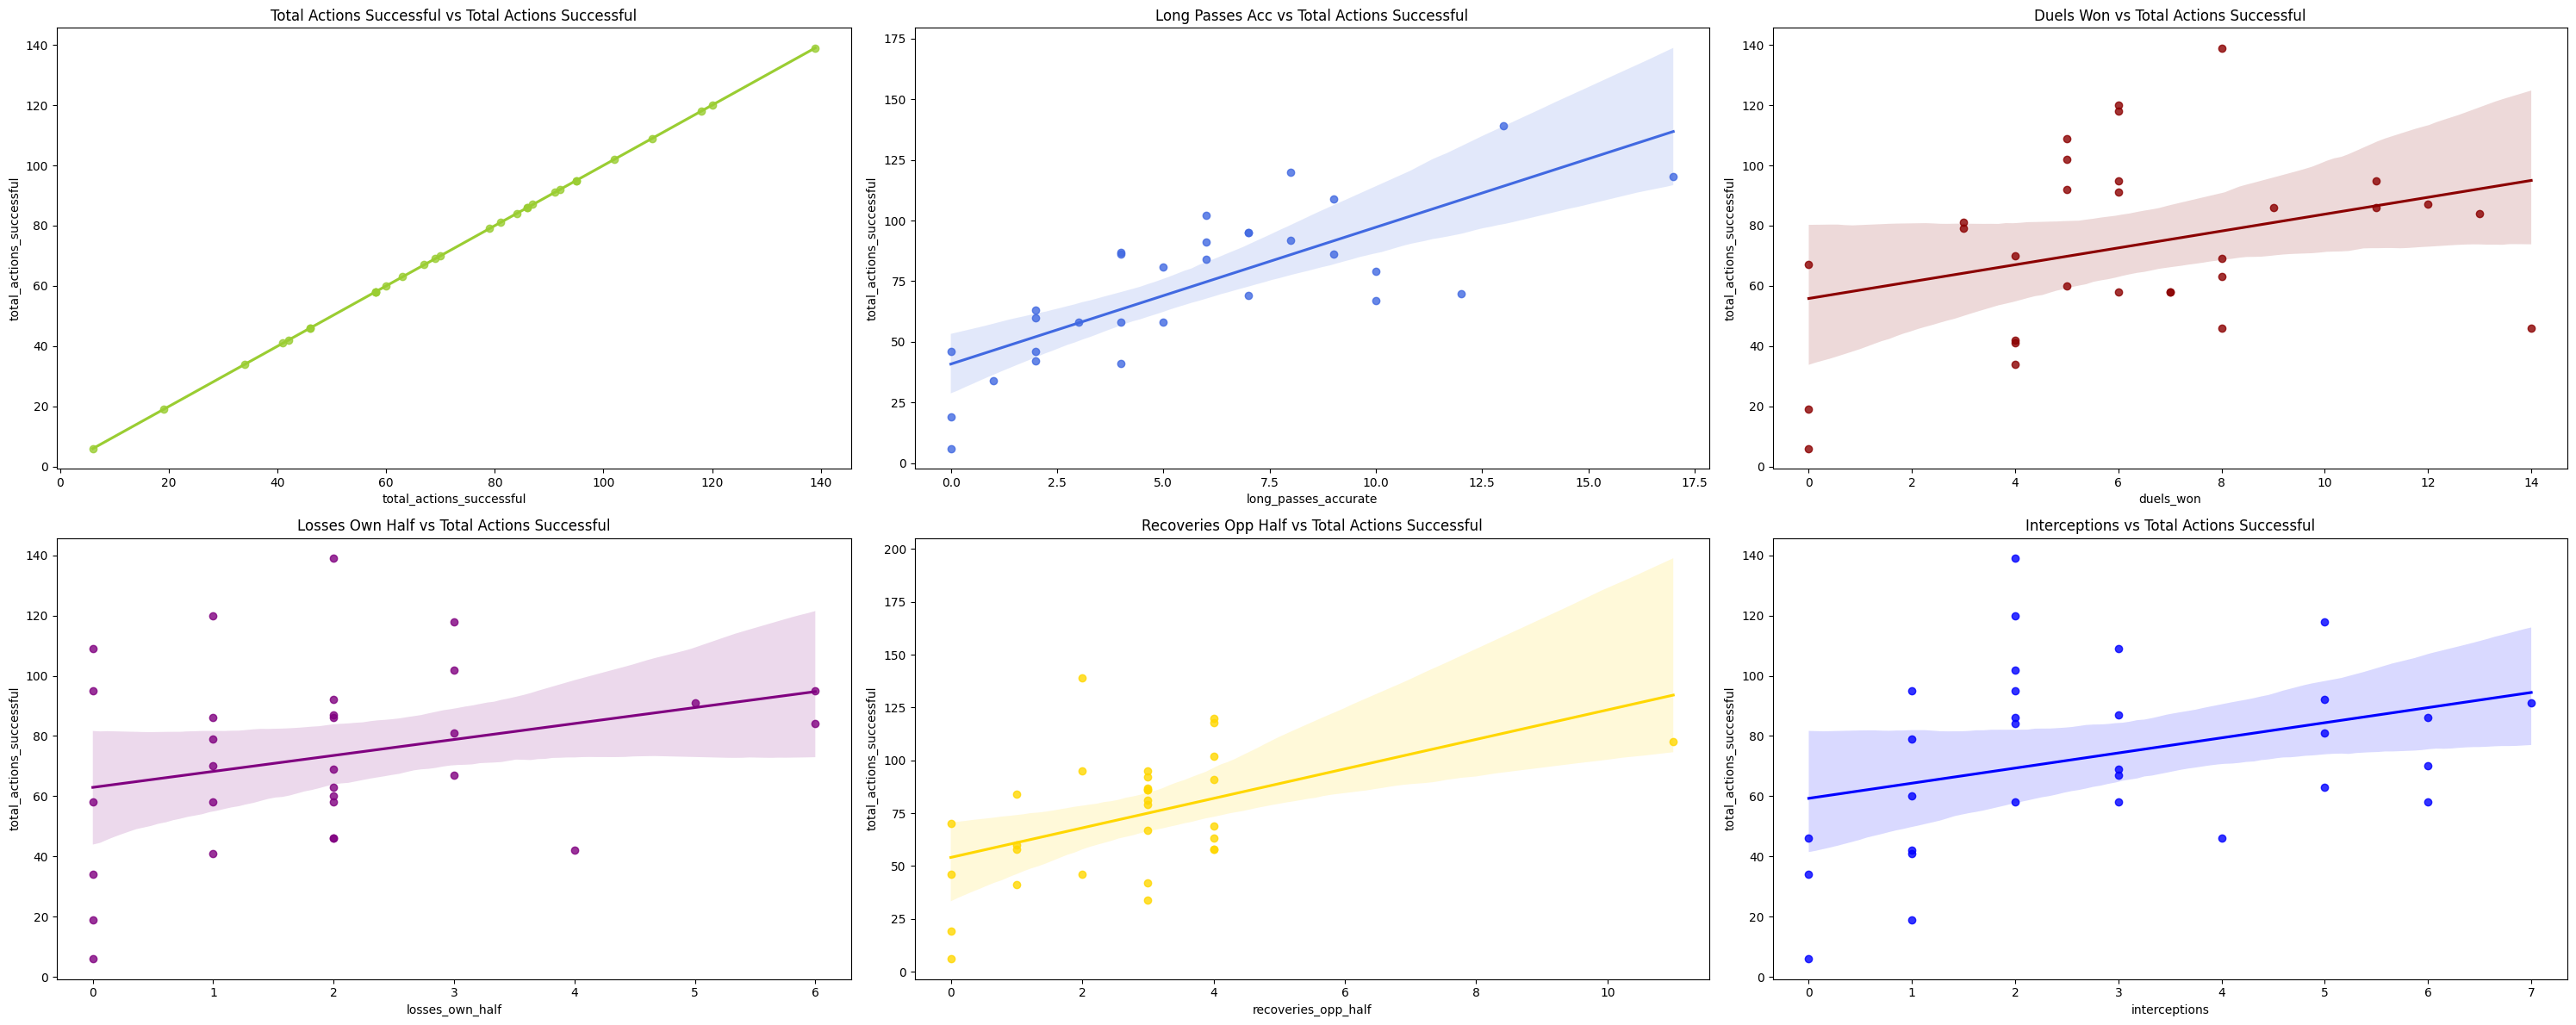

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['total_actions_successful', 'long_passes_accurate', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'passes_accurate']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['total_actions_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 3, figsize=(30, 12))

sns.regplot(x='total_actions_successful', y='total_actions_successful', data=normalized_df, ax=axs[0, 0], color='yellowgreen')
axs[0, 0].set_title('Total Actions Successful vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[0, 1], color='royalblue')
axs[0, 1].set_title('Long Passes Acc vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, ax=axs[1, 0], color='purple')
axs[1, 0].set_title('Losses Own Half vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Recoveries Opp Half vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, ax=axs[1, 2], color='blue')
axs[1, 2].set_title('Interceptions vs Total Actions Successful')

plt.tight_layout()
plt.show()

Constant Term (const): with a coefficient close to zero (1.776e-14) and a high P-value of 0.752, the constant term is statistically insignificant. On football optics, this result simply sets the baseline for the analysis, not directly related to Kroos's on-field performance.

- total_actions_successful: a coefficient of 1.0000 and a P-value of 0.000 indicate a perfect relationship between this feature and the dependent variable. It explains the entirety of the variance in total successful actions. On football optics, this perfect relationship signifies that Kroos's successful actions are the cornerstone of his performance, encompassing all elements of his game.

- long_passes_accurate: the coefficient of -3.553e-15 and a P-value of 0.689 signify no statistical relationship with total successful actions. On football optics, this implies that Kroos's long accurate passes don't have a distinct impact on his overall successful actions, indicating a more nuanced aspect of his game.

- duels_won: with a coefficient of 7.994e-15 and a P-value of 0.588, duels won don't have a statistically significant impact. On football optics, this suggests that Kroos's ability to win duels is not a defining feature of his overall successful performance, reflecting his playing style.

- losses_own_half: a coefficient of 2.665e-15 and P-value of 0.846 show no statistical significance in this feature. On football optics, this shows that losing possession in his own half does not notably affect Kroos's overall success in actions, aligning with his cautious and calculated approach to the game.

- recoveries_opp_half: with a coefficient of -5.329e-15 and a P-value of 0.641, there's no statistical significance here. On football optics, Kroos's ability to recover the ball in the opponent's half is not a significant aspect of his total successful actions, indicating other aspects of his game drive success.

- interceptions: a coefficient of 3.775e-15 and P-value of 0.734 show that interceptions are not statistically relevant. On football optics, this reveals that Kroos's interceptions are not a significant determinant of his overall successful actions, likely reflecting his positioning and role in the team.

- passes_accurate: a coefficient of -9.853e-15 and P-value of 0.390 show no significant relationship with the dependent variable. On football optics, this suggests that Kroos's accurate passes, while important, don't necessarily drive his total successful actions, reflecting the multifaceted nature of his playing style.

Overall, the model explains the total successful actions perfectly (R-squared = 1.000), but only the total_actions_successful feature itself is significant in doing so. On football optics, this underscores the complexity of Kroos's playing style, where a single metric like total successful actions encompasses various aspects of his game, from passing and dueling to recovery and interceptions. His multifaceted skillset defies simple categorization, reflecting a player with a broad and nuanced impact on the game.

### Based on Pass Accuracy

                            OLS Regression Results                            
Dep. Variable:        passes_accurate   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1098.
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           4.48e-27
Time:                        20:02:43   Log-Likelihood:                -57.730
No. Observations:                  30   AIC:                             129.5
Df Residuals:                      23   BIC:                             139.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

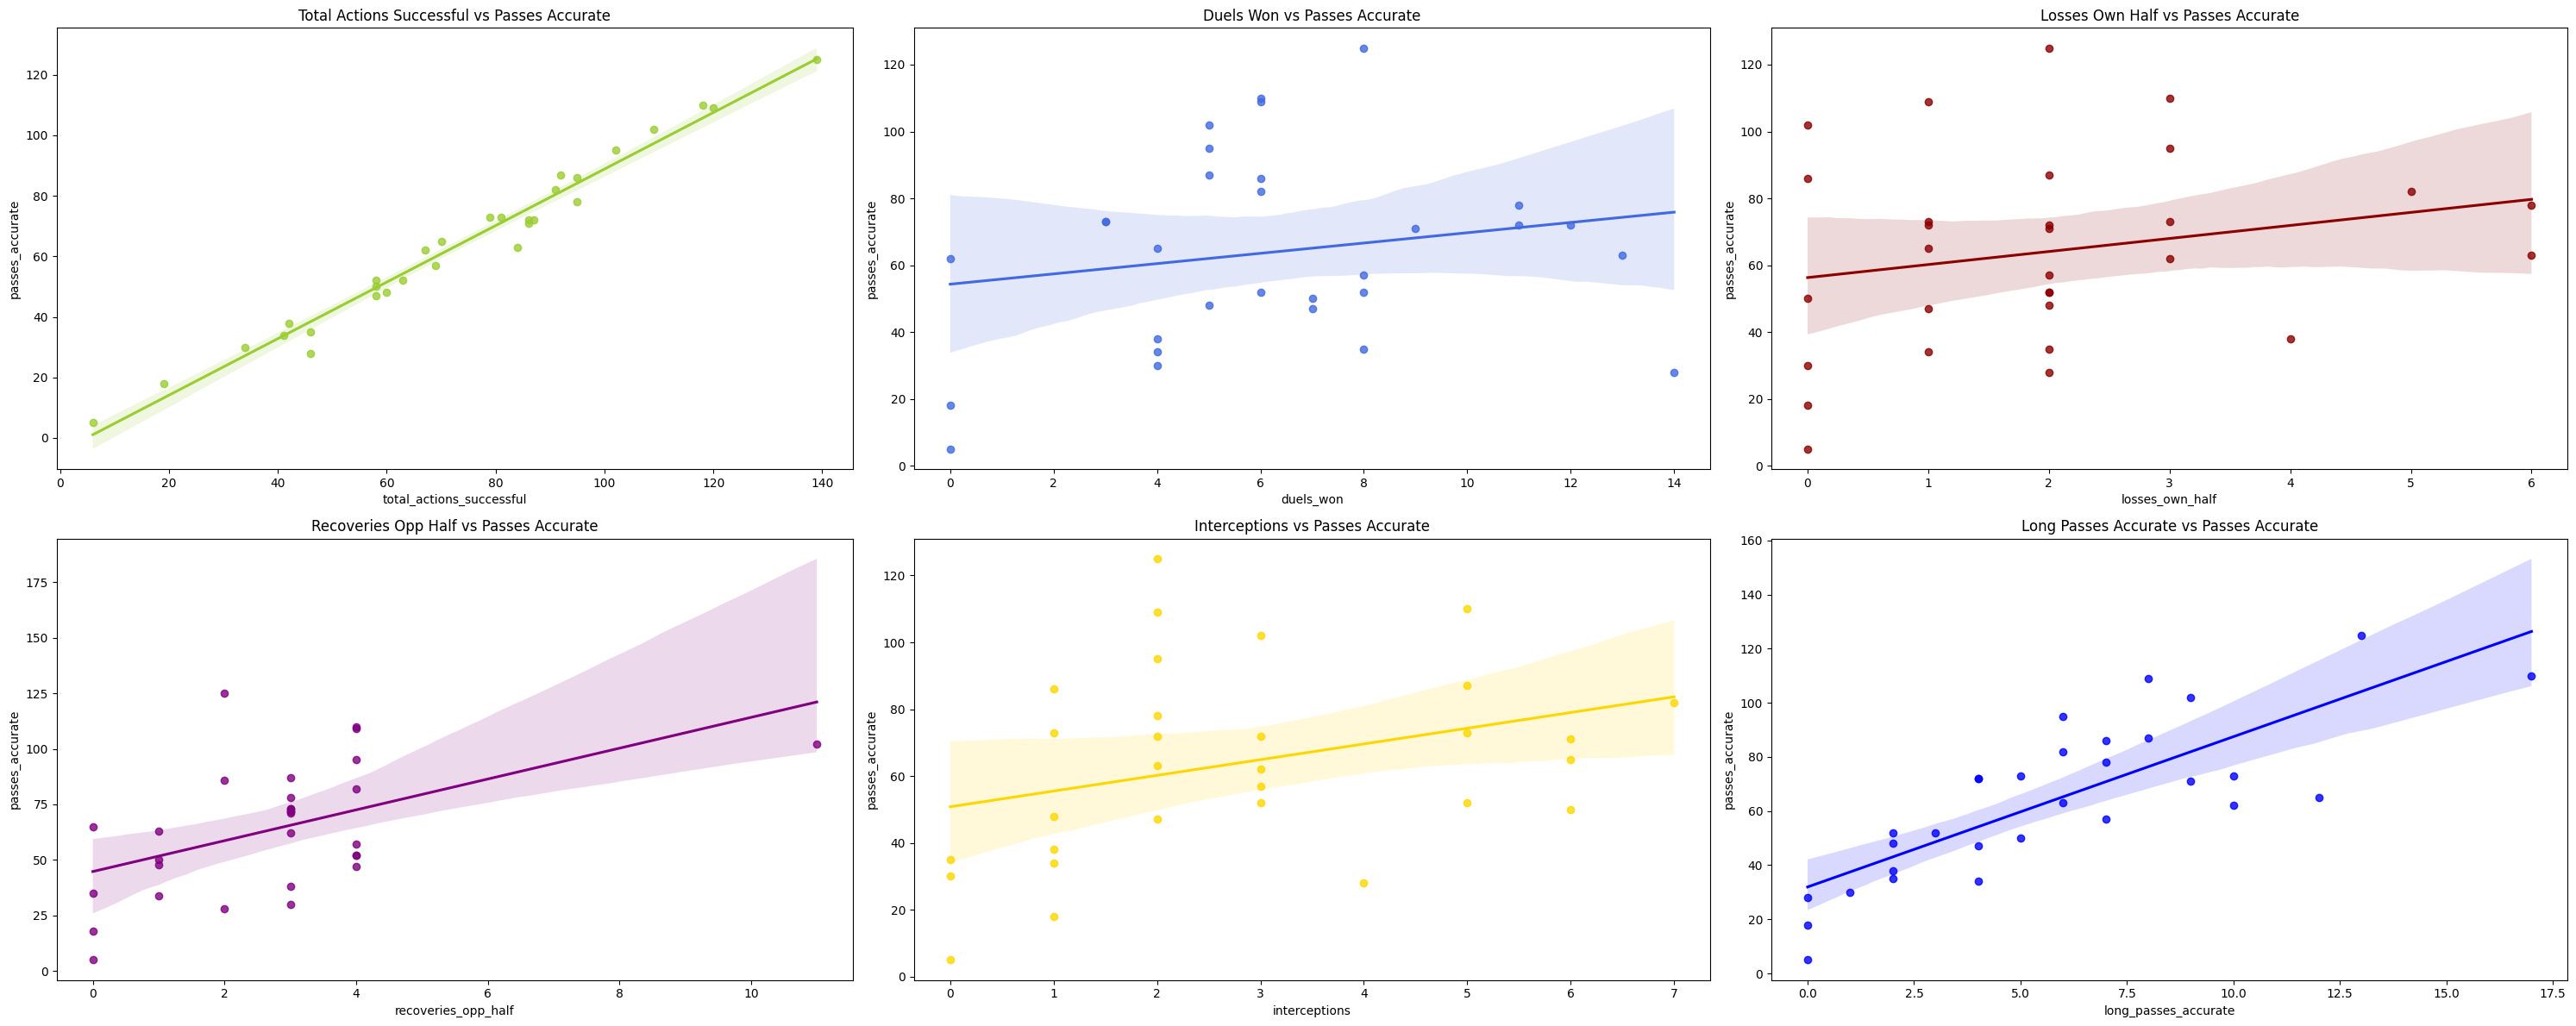

In [ ]:
# Defining the independent variables
X = normalized_df[['total_actions_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'long_passes_accurate']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['passes_accurate']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 3, figsize=(30, 12))

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, ax=axs[0, 0], color='yellowgreen')
axs[0, 0].set_title('Total Actions Successful vs Passes Accurate')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, ax=axs[0, 1], color='royalblue')
axs[0, 1].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='losses_own_half', y='passes_accurate', data=normalized_df, ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Losses Own Half vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, ax=axs[1, 0], color='purple')
axs[1, 0].set_title('Recoveries Opp Half vs Passes Accurate')

sns.regplot(x='interceptions', y='passes_accurate', data=normalized_df, ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Interceptions vs Passes Accurate')

sns.regplot(x='long_passes_accurate', y='passes_accurate', data=normalized_df, ax=axs[1, 2], color='blue')
axs[1, 2].set_title('Long Passes Accurate vs Passes Accurate')

plt.tight_layout()
plt.show()

- total_actions_successful: with a coefficient of 0.9712 and P-value close to 0, this feature is highly statistically significant in predicting accurate passes. On football optics, this strong correlation signifies that Kroos's overall successful actions translate directly into accurate passes, a key aspect of his playing prowess.

- duels_won: a coefficient of -1.1428 and P-value of 0.000 indicate a significant negative relationship with accurate passes. On football optics, winning duels doesn't translate into accurate passes for Kroos, revealing an interesting facet of his game that winning duels might be at the expense of pass accuracy.

- losses_own_half: the coefficient of -0.3947 and a P-value of 0.109 suggest this feature may not be statistically significant. On football optics, Kroos's losses in his own half may not significantly impact his accurate passing ability, indicating his resilience in maintaining passing quality.

- recoveries_opp_half: a coefficient of 0.2412 and P-value of 0.247 indicate that this feature is not statistically significant. On football optics, recoveries in the opponent's half don't significantly contribute to Kroos's passing accuracy, a subtlety in understanding his midfield role.

- interceptions: the coefficient of 0.2170 and a P-value of 0.286 suggest that this feature is not statistically significant for accurate passes. On football optics, interceptions are not integral to Kroos's passing accuracy, emphasizing his emphasis on positioning and control rather than aggressive intercepting plays.

- long_passes_accurate: with a coefficient of 0.0056 and a P-value of 0.973, this feature is not statistically significant. On football optics, the long accurate passes are not a distinguishing factor in Kroos's overall pass accuracy, highlighting his ability to mix both short and long passes without impacting accuracy.

Overall, the model has an excellent R-squared value of 0.997, explaining almost all the variation in Kroos's accurate passes. On football optics, the findings illuminate Kroos's unique style, where total successful actions and duels won play key roles in defining his accurate passing. Other features don't significantly impact his passing accuracy, providing a nuanced understanding of his gameplay and what makes him one of the world's top midfielders.

### Based on Long Pass Accuracy

                             OLS Regression Results                             
Dep. Variable:     long_passes_accurate   R-squared:                       0.722
Model:                              OLS   Adj. R-squared:                  0.649
Method:                   Least Squares   F-statistic:                     9.953
Date:                  Sat, 26 Aug 2023   Prob (F-statistic):           1.89e-05
Time:                          20:02:45   Log-Likelihood:                -65.248
No. Observations:                    30   AIC:                             144.5
Df Residuals:                        23   BIC:                             154.3
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

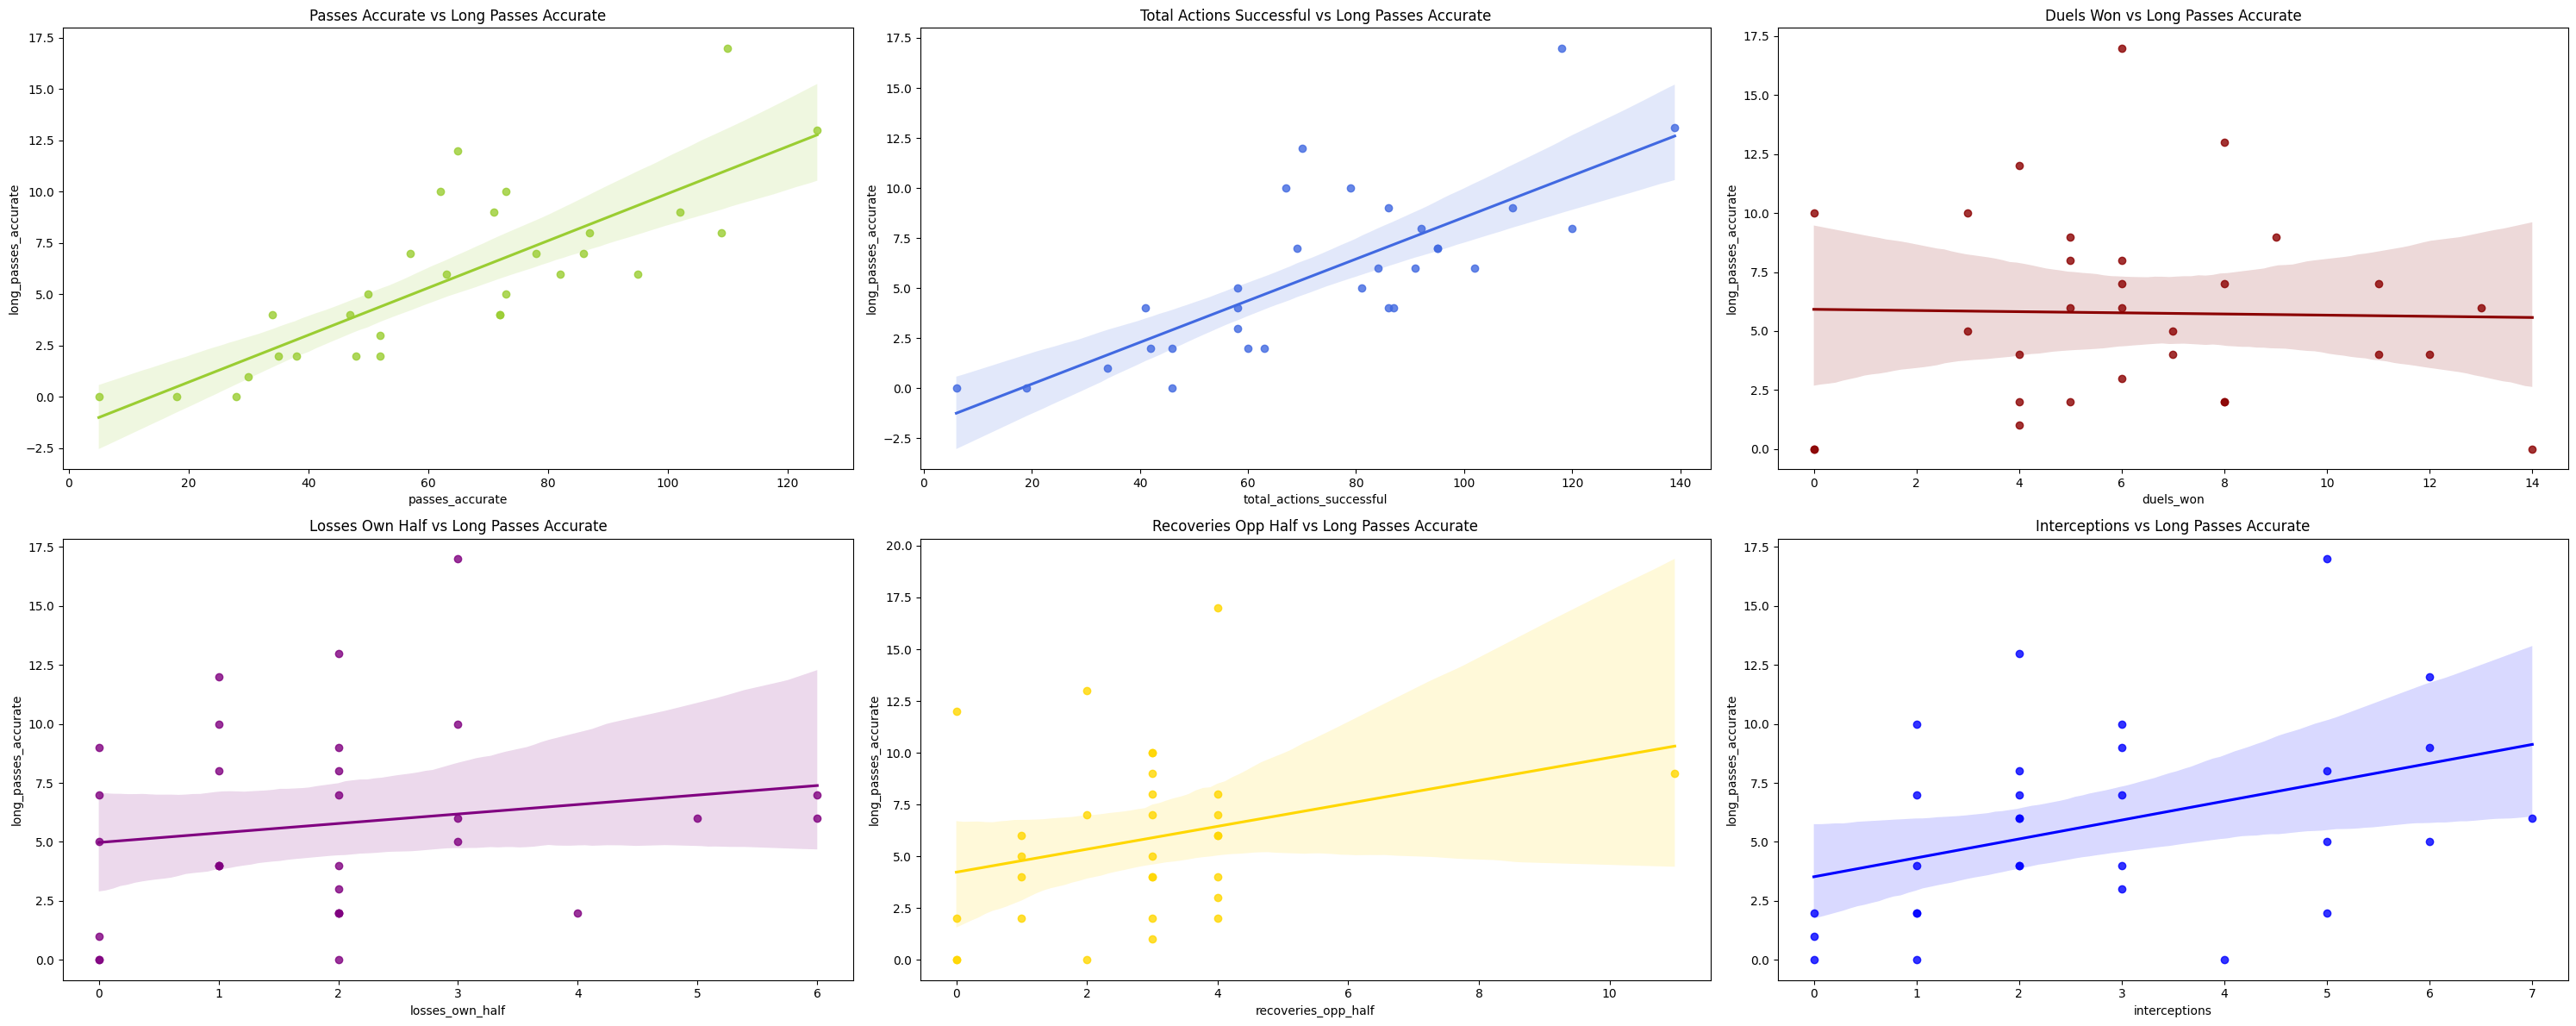

In [ ]:
# Defining the independent variables
X = normalized_df[['passes_accurate', 'total_actions_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['long_passes_accurate']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 3, figsize=(30, 12))

sns.regplot(x='passes_accurate', y='long_passes_accurate', data=normalized_df, ax=axs[0, 0], color='yellowgreen')
axs[0, 0].set_title('Passes Accurate vs Long Passes Accurate')

sns.regplot(x='total_actions_successful', y='long_passes_accurate', data=normalized_df, ax=axs[0, 1], color='royalblue')
axs[0, 1].set_title('Total Actions Successful vs Long Passes Accurate')

sns.regplot(x='duels_won', y='long_passes_accurate', data=normalized_df, ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Duels Won vs Long Passes Accurate')

sns.regplot(x='losses_own_half', y='long_passes_accurate', data=normalized_df, ax=axs[1, 0], color='purple')
axs[1, 0].set_title('Losses Own Half vs Long Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='long_passes_accurate', data=normalized_df, ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Recoveries Opp Half vs Long Passes Accurate')

sns.regplot(x='interceptions', y='long_passes_accurate', data=normalized_df, ax=axs[1, 2], color='blue')
axs[1, 2].set_title('Interceptions vs Long Passes Accurate')

plt.tight_layout()
plt.show()

### Based on Duels Won

                            OLS Regression Results                            
Dep. Variable:              duels_won   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     25.00
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           5.44e-09
Time:                        20:02:47   Log-Likelihood:                -49.982
No. Observations:                  30   AIC:                             114.0
Df Residuals:                      23   BIC:                             123.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

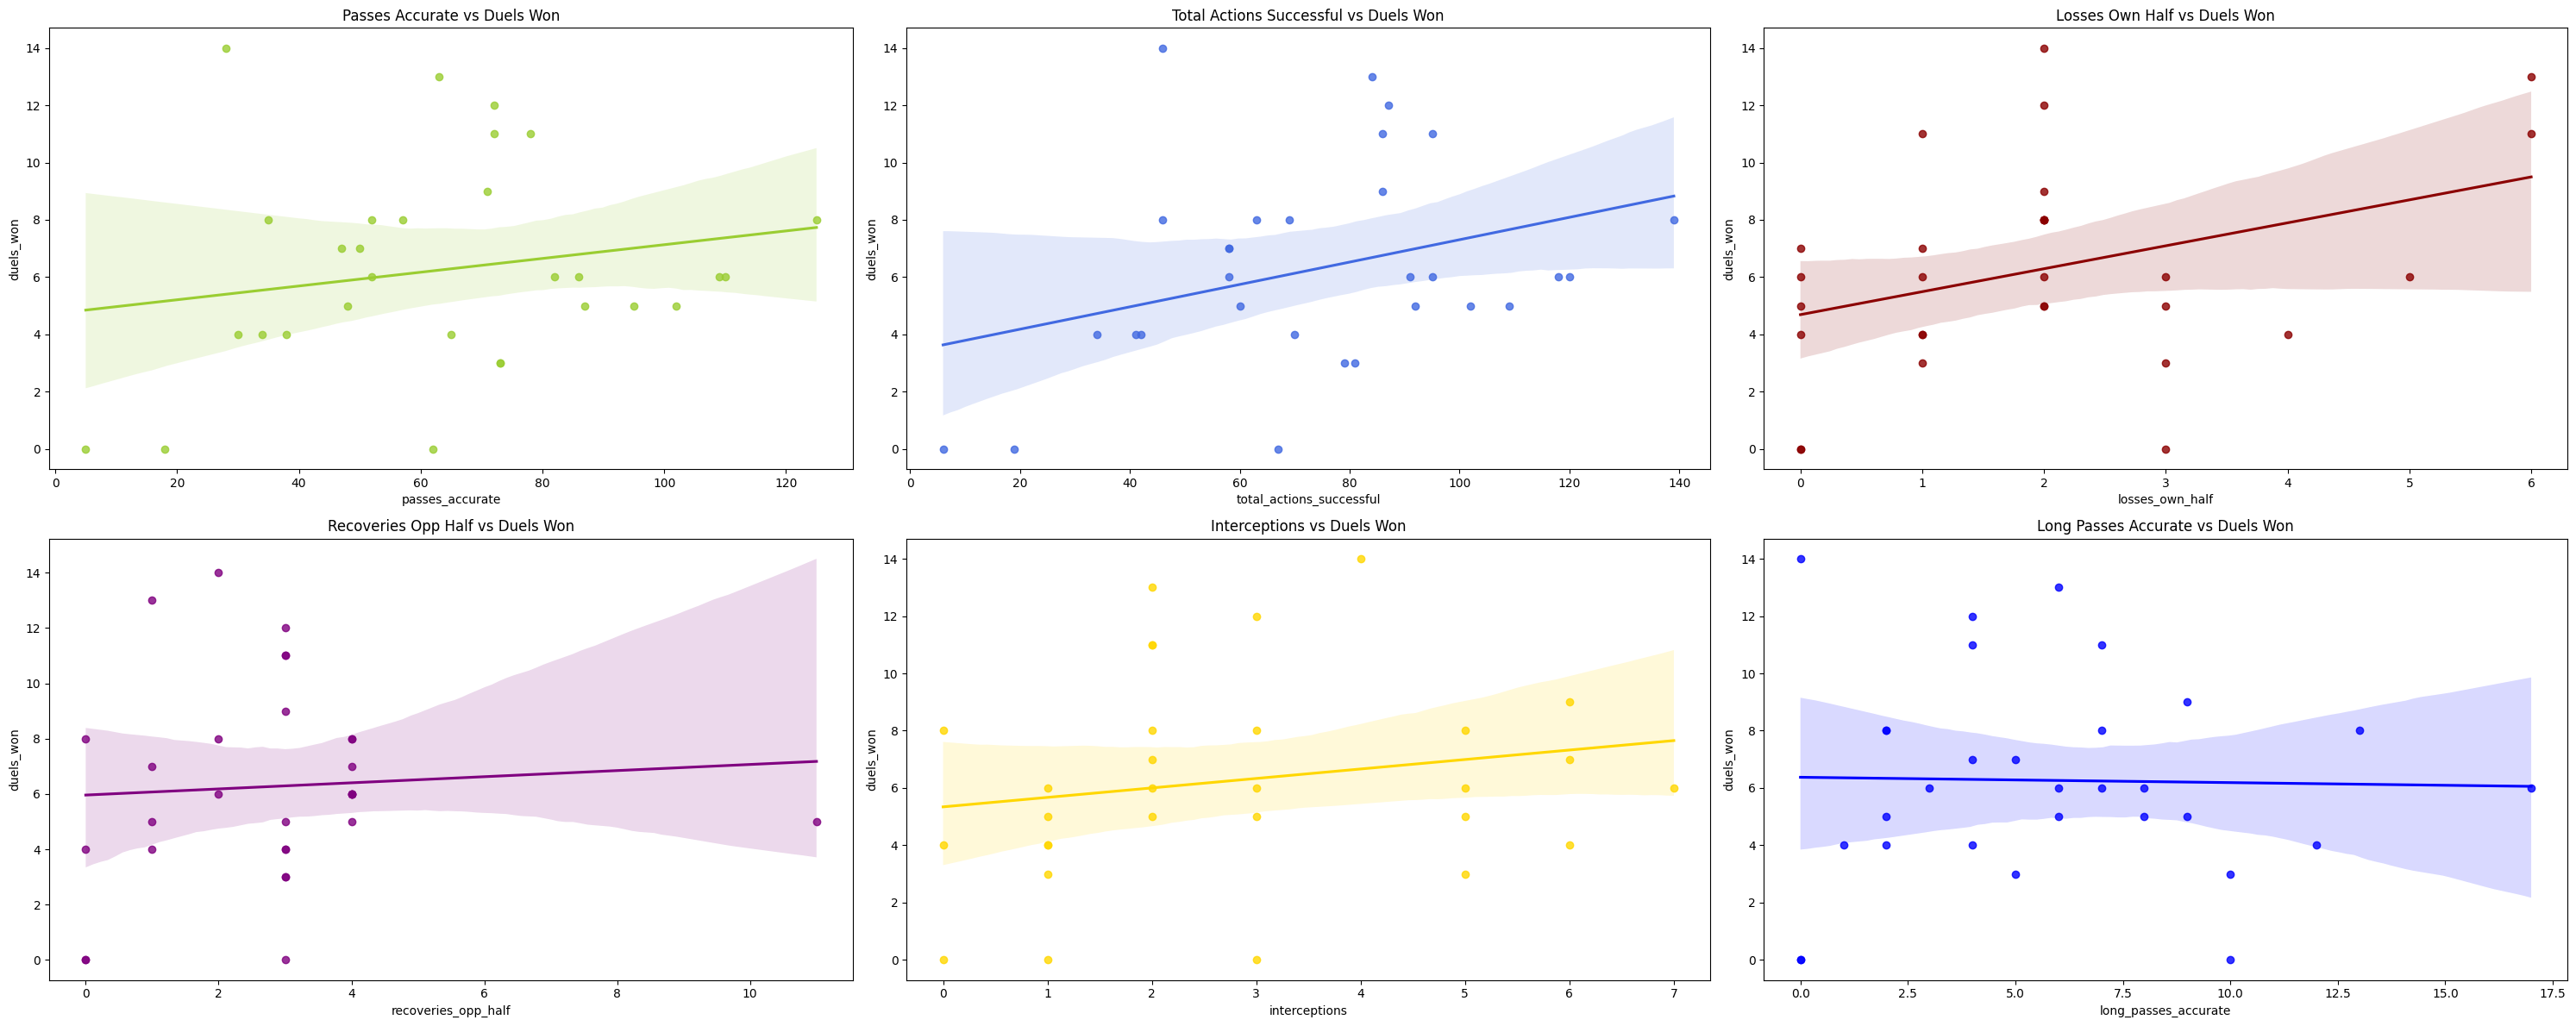

In [ ]:
# Defining the independent variables
X = normalized_df[['passes_accurate', 'total_actions_successful', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'long_passes_accurate']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['duels_won']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 3, figsize=(30, 12))

sns.regplot(x='passes_accurate', y='duels_won', data=normalized_df, ax=axs[0, 0], color='yellowgreen')
axs[0, 0].set_title('Passes Accurate vs Duels Won')

sns.regplot(x='total_actions_successful', y='duels_won', data=normalized_df, ax=axs[0, 1], color='royalblue')
axs[0, 1].set_title('Total Actions Successful vs Duels Won')

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Losses Own Half vs Duels Won')

sns.regplot(x='recoveries_opp_half', y='duels_won', data=normalized_df, ax=axs[1, 0], color='purple')
axs[1, 0].set_title('Recoveries Opp Half vs Duels Won')

sns.regplot(x='interceptions', y='duels_won', data=normalized_df, ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Interceptions vs Duels Won')

sns.regplot(x='long_passes_accurate', y='duels_won', data=normalized_df, ax=axs[1, 2], color='blue')
axs[1, 2].set_title('Long Passes Accurate vs Duels Won')

plt.tight_layout()
plt.show()

## Sci-Kit Learn Regression Models

### The linear regression model is represented as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$

### Based on Total Actions

Mean r^2 over all K-Fold folds: 0.9920246806922526
Coefficients:
long_passes_accurate: 0.11952014151759233
duels_won: 1.2299588478964787
losses_own_half: 0.3539970965880726
recoveries_opp_half: -0.3689542414553653
interceptions: -0.41626459692666135
passes_accurate: 1.0114288270542375
Mean squared error: 4.73
Coefficient of determination: 0.99


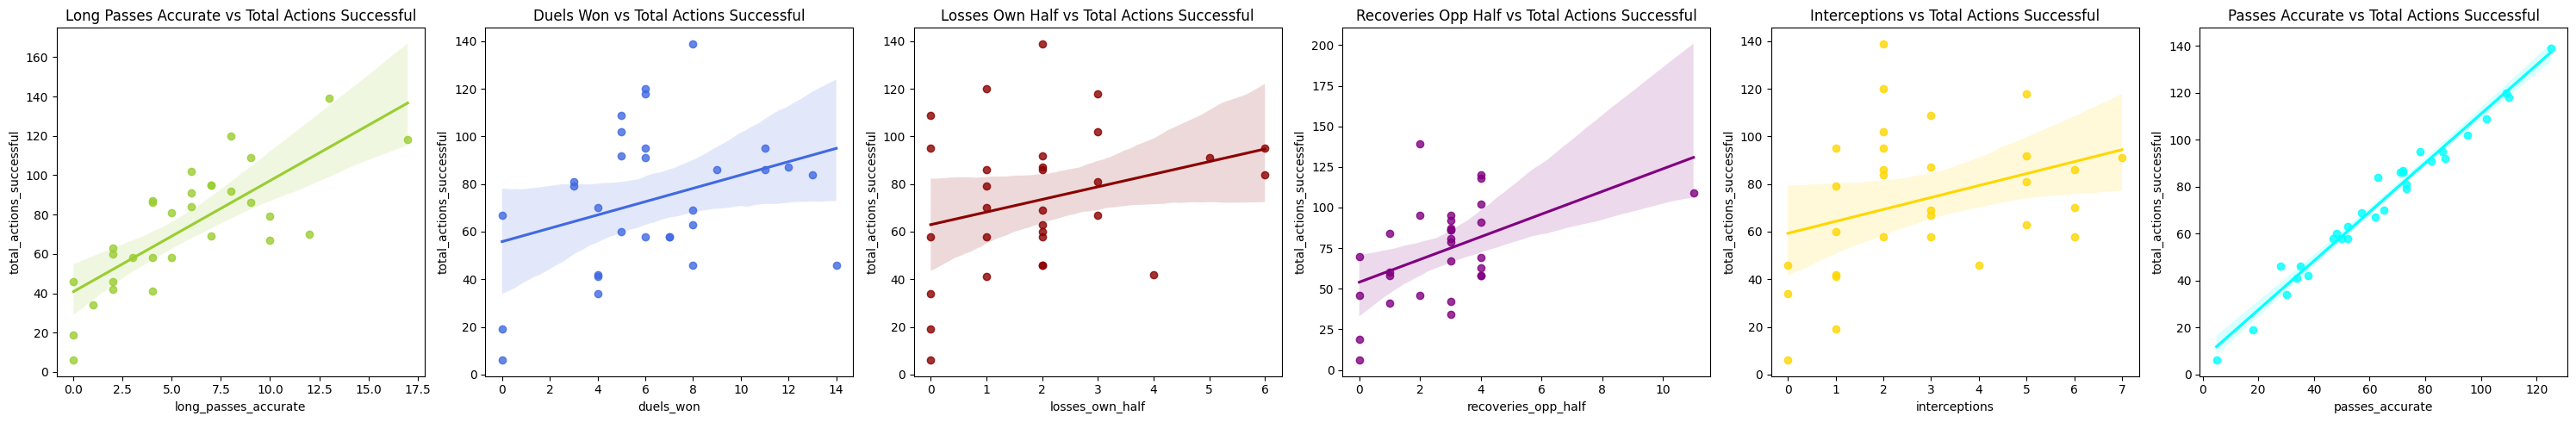

In [ ]:
# Prepare the data
X = normalized_df[['long_passes_accurate', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'passes_accurate']]
y = normalized_df['total_actions_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['long_passes_accurate', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'passes_accurate']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 5))

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Losses Own Half vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Recoveries Opp Half vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Interceptions vs Total Actions Successful')

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='cyan', ax=axs[5])
axs[5].set_title('Passes Accurate vs Total Actions Successful')

plt.tight_layout()
plt.show()

Long Passes Accurate (0.119): the coefficient for long_passes_accurate signifies a positive correlation, though relatively minor, with the target variable, reflecting statistical significance but with limited impact. On football optics, this indicates that Kroos's ability to execute accurate long passes contributes to his overall performance but is not the most defining aspect of his game.

Duels Won (1.22): Duels won has a significant coefficient, highlighting a strong positive relationship with performance according to data analysis. On football optics, this reflects Kroos's competitive edge and his ability to win individual battles, a key element that shapes his influence on the field.

Losses Own Half (0.35): The positive coefficient for losses_own_half shows a moderate effect on the outcome; however, this relationship might seem counterintuitive from a statistical standpoint. On football optics, it could be interpreted as a reflection of Kroos's aggressive playstyle, where losses in his own half may correlate with risk-taking that sometimes leads to positive results.

Recoveries Opp Half (-0.36): This negative coefficient emphasizes a counterintuitive relationship in statistical terms. On football optics, it may signify that Kroos's role isn't primarily focused on recoveries in the opposition half, and his performance might not necessarily hinge on this aspect of the game.

Interceptions (-0.41): The negative coefficient for interceptions indicates an inverse relationship with the target variable, a complex aspect to interpret statistically. On football optics, it suggests that while Kroos might not be known for his intercepting abilities, his performance in other areas more than compensates for this aspect of his game.

Passes Accurate (1.011): A strong positive coefficient for passes_accurate reflects a significant correlation with performance from a data science viewpoint. On football optics, this strongly correlates with Kroos's renowned passing ability, an essential part of his game that allows him to control matches and dictate the tempo.

Overall, the Linear Regression Model for Toni Kroos yields an impressive mean r^2 value of 0.9920246806922526 and a coefficient of determination of 0.99, revealing a highly predictive model that captures most of the variance in the dependent variable. The features like "duels_won" and "passes_accurate" hold strong relevance in both statistical analysis and football interpretation, mirroring Kroos's proficiency in these areas. Some coefficients such as "recoveries_opp_half" and "interceptions" may need further contextual understanding to reconcile the statistical outcomes with football insights. The mean squared error of 4.73 is low, further validating the model's accuracy in reflecting the intricate attributes that make Toni Kroos a world-class player. In both statistical and football terms, the model provides a comprehensive understanding of the facets of his game, aligning closely with expert analysis and observation.

### Based on Pass Accuracy

Mean r^2 over all K-Fold folds: 0.9924961336912042
Coefficients:
total_actions_successful: 0.9745542493791115
duels_won: -1.1670097034203126
losses_own_half: -0.37702887766332116
recoveries_opp_half: 0.45624958551560296
interceptions: 0.36528588868928646
long_passes_accurate: -0.03944788678565903
Mean squared error: 4.59
Coefficient of determination: 0.99


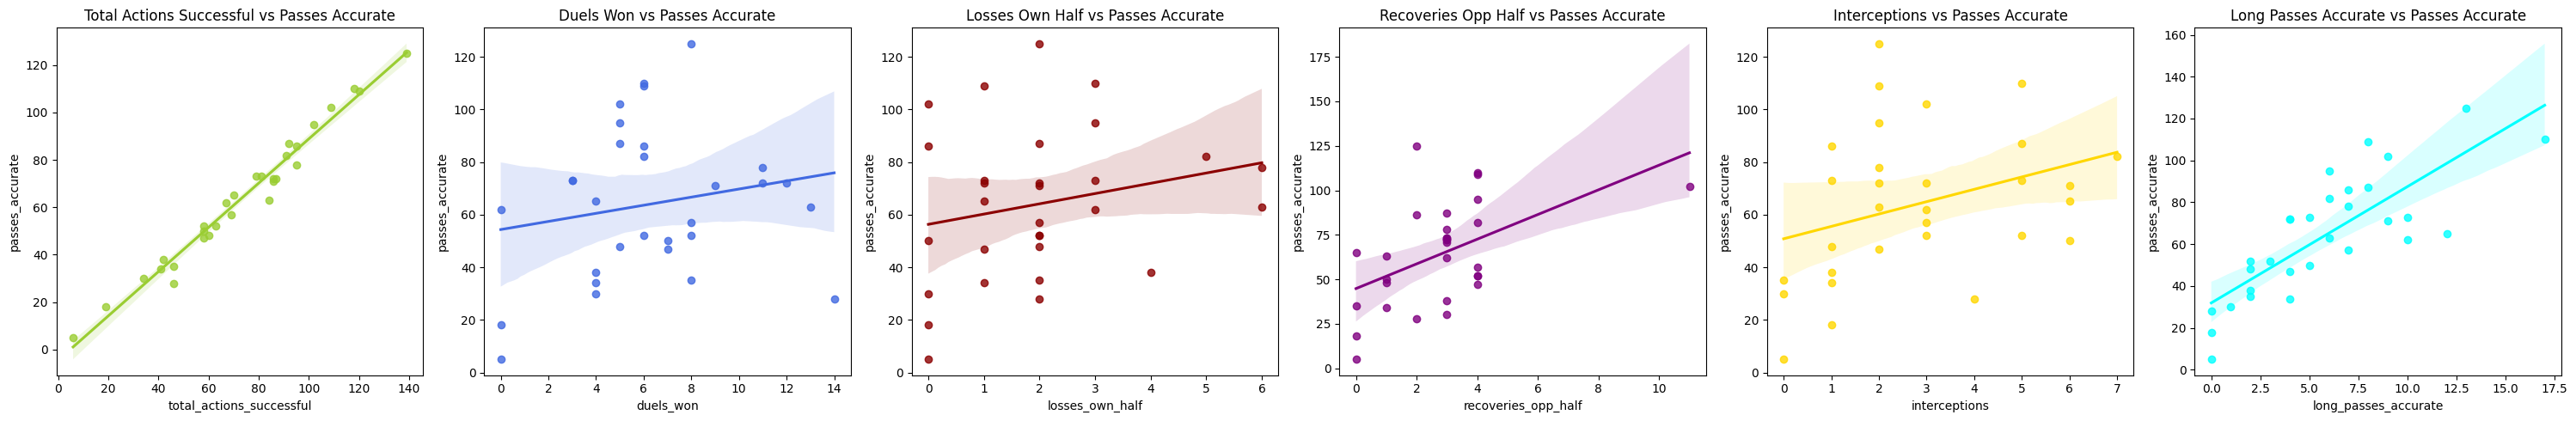

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'long_passes_accurate']]
y = normalized_df['passes_accurate']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['total_actions_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'long_passes_accurate']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(30, 5))

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Total Actions Successful vs Passes Accurate')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='losses_own_half', y='passes_accurate', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Losses Own Half vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Recoveries Opp Half vs Passes Accurate')

sns.regplot(x='interceptions', y='passes_accurate', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Interceptions vs Passes Accurate')

sns.regplot(x='long_passes_accurate', y='passes_accurate', data=normalized_df, color='cyan', ax=axs[5])
axs[5].set_title('Long Passes Accurate vs Passes Accurate')

plt.tight_layout()
plt.show()

Total Actions Successful (0.97): From a data scientist's viewpoint, the positive coefficient for total_actions_successful suggests a strong and positive influence on the overall performance, emphasizing the importance of successful actions in the game. On football optics, this highlights Kroos's effectiveness and efficiency on the field, demonstrating his ability to execute successful plays consistently.

Duels Won (-1.16): The negative coefficient for duels_won indicates an inverse relationship with performance, an unexpected result from a statistical standpoint. On football optics, this could point to Kroos's role as a playmaker rather than a duelist, where winning individual battles may not be a critical aspect of his performance.

Losses Own Half (-0.37): The negative coefficient shows a moderate inverse relationship, making sense from a data scientist's perspective as losses in one's own half would generally be considered detrimental. On football optics, this reflects Kroos's need to minimize mistakes in his defensive area to maximize his positive impact on the game.

Recoveries Opp Half (0.45): The positive coefficient signifies a moderate correlation with the target variable, highlighting its statistical relevance. On football optics, this highlights Kroos's contribution to regaining possession in the opposition half, an essential aspect of his defensive work.

Interceptions (0.36): The positive coefficient for interceptions shows a moderate influence on the outcome from a statistical standpoint. On football optics, this reflects Kroos's ability to read the game and intercept passes, a vital element in disrupting the opponent's play.

Long Passes Accurate (-0.03): A slight negative coefficient for long_passes_accurate indicates a minor and unexpected inverse relationship. On football optics, this could suggest that Kroos's long passing, while renowned, may not be the most crucial aspect of his current playing style, or this particular statistic might not capture the essence of his long-passing ability in this context.

Overall: with a mean r^2 value of 0.99 and a coefficient of determination of 0.99, the model presents an exceptional predictive capability. The mean squared error of 4.59 emphasizes the model's accuracy. Features like "total_actions_successful" and "interceptions" reveal strong relevance in understanding Kroos's game, while the negative coefficients for "duels_won" and "long_passes_accurate" may require a nuanced football understanding to interpret. In both statistical and football terms, the model robustly captures the multiple facets that encompass Toni Kroos's playing style and influence on the field, reflecting the intricacy and dynamism of modern football.

### Based on Long Pass Accuracy

Mean r^2 over all K-Fold folds: 0.5467992474580136
Coefficients:
passes_accurate: 0.2979092068215309
total_actions_successful: -0.16743345892967276
recoveries_opp_half: -0.33868800635243185
interceptions: 0.2980759075273219
Mean squared error: 4.55
Coefficient of determination: 0.56


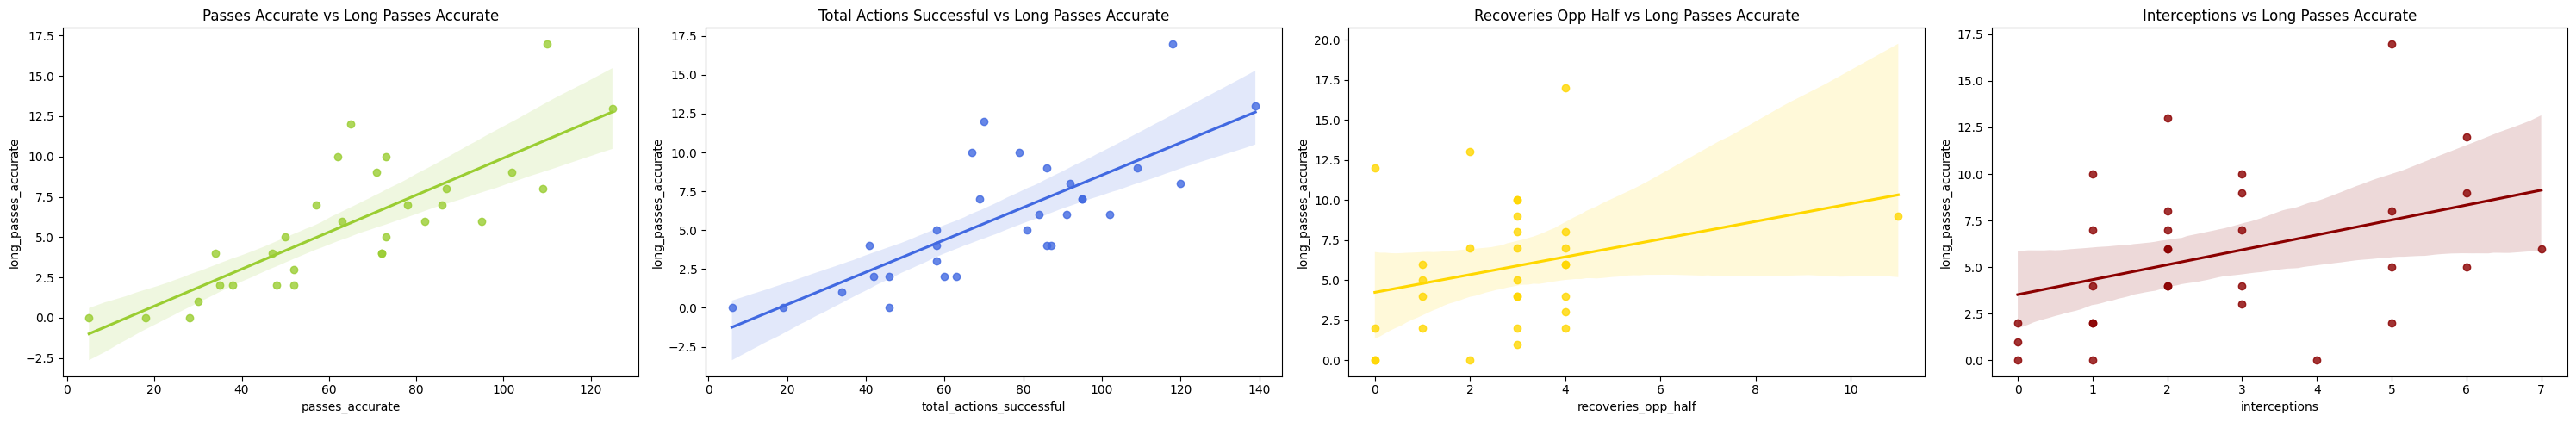

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'total_actions_successful', 'recoveries_opp_half', 'interceptions']]
y = normalized_df['long_passes_accurate']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['passes_accurate', 'total_actions_successful', 'recoveries_opp_half', 'interceptions']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, figsize=(30, 5))

sns.regplot(x='passes_accurate', y='long_passes_accurate', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Passes Accurate vs Long Passes Accurate')

sns.regplot(x='total_actions_successful', y='long_passes_accurate', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Total Actions Successful vs Long Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='long_passes_accurate', data=normalized_df, color='gold', ax=axs[2])
axs[2].set_title('Recoveries Opp Half vs Long Passes Accurate')

sns.regplot(x='interceptions', y='long_passes_accurate', data=normalized_df, color='darkred', ax=axs[3])
axs[3].set_title('Interceptions vs Long Passes Accurate')

plt.tight_layout()
plt.show()

### Based on Duels Won

Mean r^2 over all K-Fold folds: 0.42273625773937795
Coefficients:
passes_accurate: -0.6852029914565495
total_actions_successful: 0.700916001290035
losses_own_half: -0.1115853920078582
long_passes_accurate: -0.1598115620209922
Mean squared error: 1.61
Coefficient of determination: 0.45


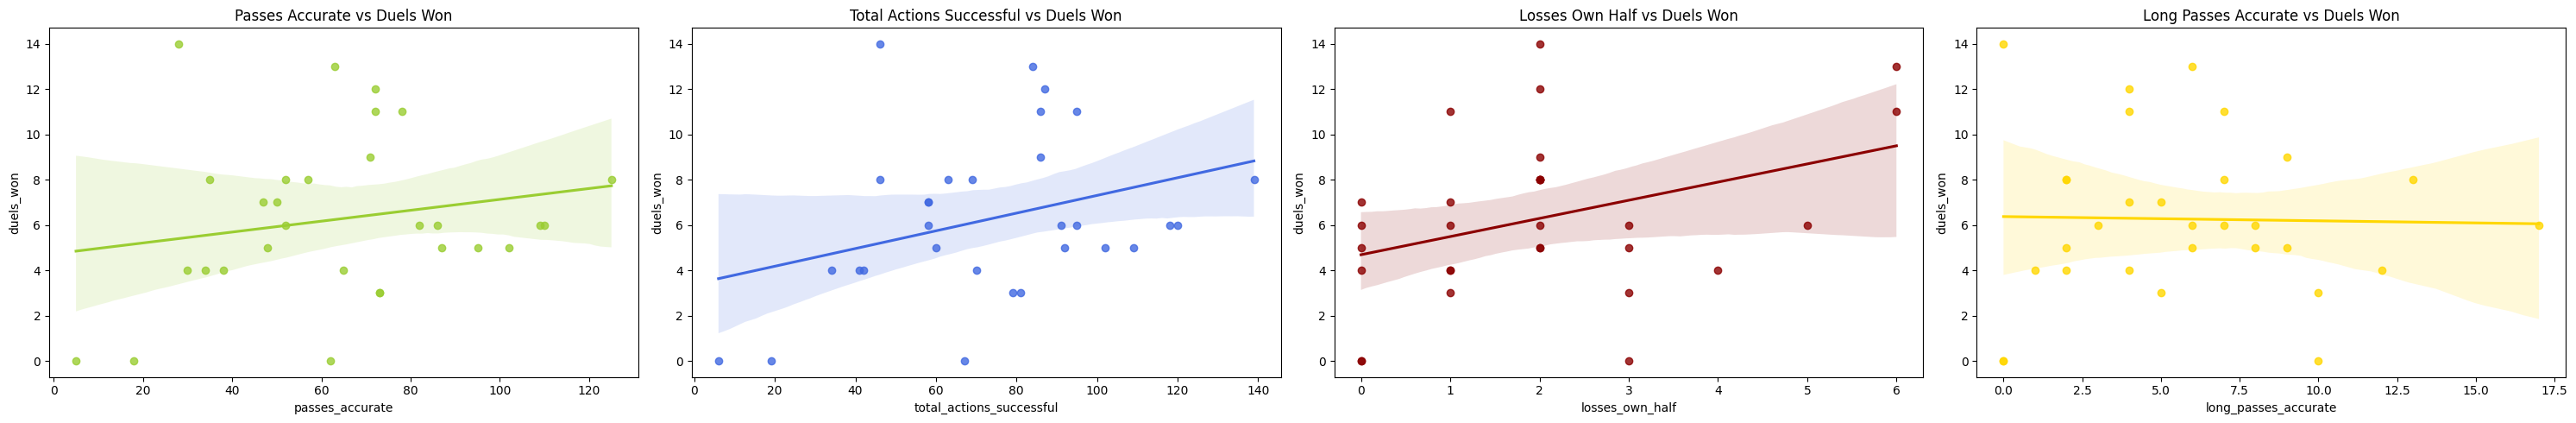

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'total_actions_successful', 'losses_own_half', 'long_passes_accurate']]
y = normalized_df['duels_won']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['passes_accurate', 'total_actions_successful', 'losses_own_half', 'long_passes_accurate']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, figsize=(30, 5))

sns.regplot(x='passes_accurate', y='duels_won', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Passes Accurate vs Duels Won')

sns.regplot(x='total_actions_successful', y='duels_won', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Total Actions Successful vs Duels Won')

sns.regplot(x='losses_own_half', y='duels_won', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Losses Own Half vs Duels Won')

sns.regplot(x='long_passes_accurate', y='duels_won', data=normalized_df, color='gold', ax=axs[3])
axs[3].set_title('Long Passes Accurate vs Duels Won')

plt.tight_layout()
plt.show()

## XGBoost & Cross-Validation

### The prediction for XGBoost is given by:

$$ \hat{y} = \sum_{k=1}^{K} f_k(x) $$

#### where $$ f_k(x) $$ is the prediction of the $$ k $$-th weak learner.

### Based on Total Actions

Mean cross-validation score: 0.95
MAE: 3.2267706129286022
MSE: 15.990412563297367
R^2: 0.9661184624456658


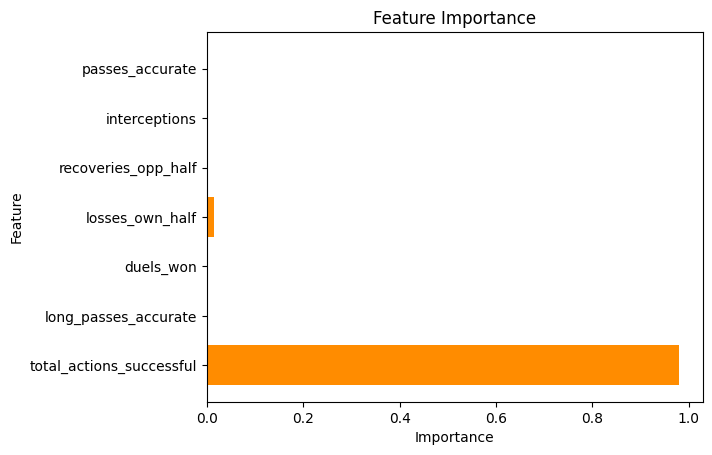

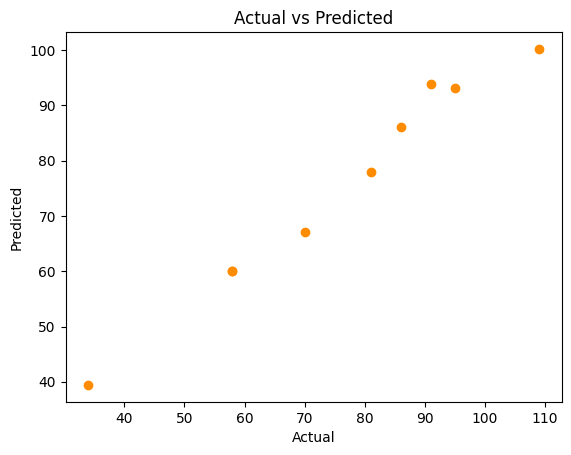

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'long_passes_accurate', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'passes_accurate']]
y = normalized_df['total_actions_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='darkorange') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='darkorange')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

- Mean Cross-Validation Score:  a mean cross-validation score of 0.95 suggests that the model is very accurate across different subsets of the data, making it robust and dependable for predictions. On football optics, this indicates a high consistency in Toni Kroos's performance across different matches and situations, reflecting his reliability as a player.

- Mean Absolute Error (MAE): the MAE measures the average absolute differences between the predicted and actual values. An MAE of 3.23 means the model's predictions are, on average, 3.23 units away from the actual outcomes.
On football optics, this might signify that the model's assessment of Toni Kroos's actions might sometimes differ slightly from what is observed on the field, though the difference is fairly small.

- Mean Squared Error (MSE): the MSE takes the squared differences between the predicted and actual values and averages them. A value of 15.99 suggests a good fit but emphasizes larger errors more than MAE. On football optics, this might mean that while overall the model's understanding of Toni Kroos's performance is solid, occasional significant discrepancies might occur in predicting more complex aspects of his game.

- Coefficient of Determination (R^2): the R-squared value of 0.9661 indicates that approximately 96.61% of the variation in the dependent variable can be explained by the model. This is an excellent indication of fit, demonstrating that the model is capturing most of the underlying patterns in the data.On football optics, this means that the model's representation of Toni Kroos's play is highly accurate, reflecting a deep understanding of his contributions and style.

The given XGBoost & Cross-Validation model applied to Toni Kroos's performance exhibits strong predictive power, with a high degree of accuracy, robustness, and nuanced understanding of the player's characteristics.On football optics, these statistics translate into a rich and precise analysis of Toni Kroos's play. Coaches, teammates, and fans can rely on this model to understand his impact on the game, pinpoint strengths, and identify areas for improvement. The high cross-validation score and R^2 value, in particular, demonstrate the model's ability to reflect Toni Kroos's consistency and quality as a professional footballer.

### Based on Pass Accuracy 

Mean cross-validation score: 0.91
MAE: 3.4683350457085504
MSE: 14.163661021459525
R^2: 0.9669607031811364


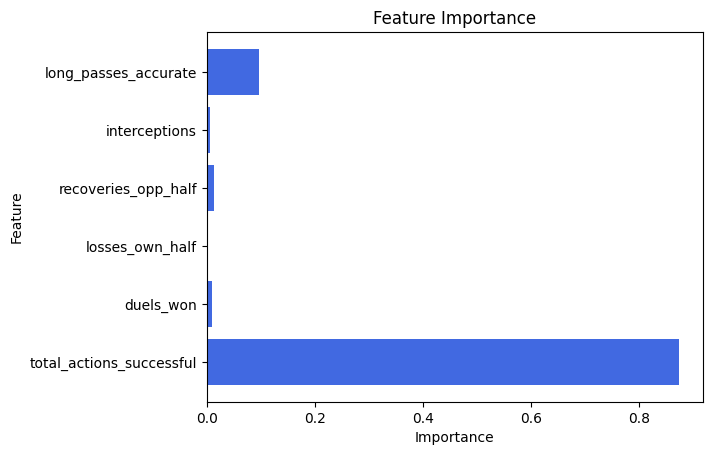

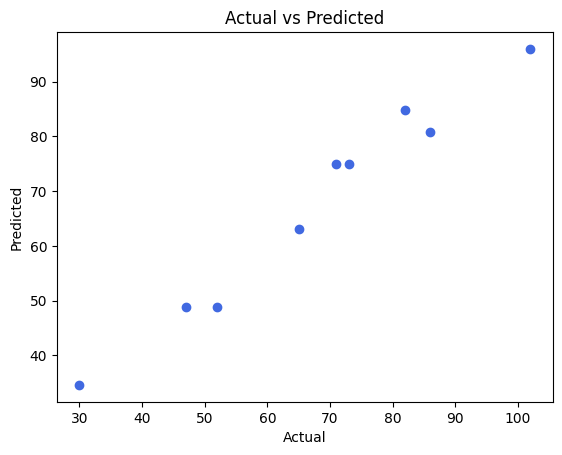

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'duels_won', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'long_passes_accurate']]
y = normalized_df['passes_accurate']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='royalblue') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='royalblue')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

- Mean Cross-Validation Score: a cross-validation score of 0.91 means the model performs well on unseen data, reflecting its generalization ability. On football optics, this indicates that Toni Kroos’s performance is consistent and the model can accurately predict his play across different matches, signifying his adaptability on the field.

- Mean Absolute Error (MAE): the MAE of 3.47 shows that the average absolute error between predicted and actual values is moderate, denoting precision but with some room for improvement. On football optics, this suggests that the model captures most aspects of Kroos's game, but there might be occasional discrepancies, reflecting the complexity and dynamism of his play.

- Mean Squared Error (MSE): an MSE of 14.16 emphasizes the larger errors more than MAE, pointing to a good but not perfect prediction, with some significant differences between predictions and actual outcomes. On football optics, this could translate to occasional mismatches between the model's understanding and the actual performance in high-stakes situations or specific plays, emphasizing the nuances of Kroos's play style.

- Coefficient of Determination (R^2): an R^2 value of 0.9669 is outstanding, meaning that 96.69% of the variance in the dependent variable is explained by the model. On football optics, this means that Toni Kroos's playing style, effectiveness, and contribution to the game are almost fully captured by this model, reflecting his impact and importance on the pitch.

The Toni Kroos XGBoost & Cross-Validation Model provides a comprehensive and largely accurate representation of the player's performance, with a slight decrease in cross-validation score compared to previous models but still showing high relevance and adaptability. On football optics, these statistics create a vivid picture of Kroos's gameplay. The combination of high cross-validation score and R^2 value with moderate error metrics paints a portrait of a player whose actions are largely consistent, precise, and influential. Fans and analysts can leverage this model to understand Kroos's unique blend of skills and how he leverages them to achieve success in various football scenarios. It also hints at the complexity of modern football and the intricate understanding required to model players at Kroos's elite level.

### Based on Long Pass Accuracy

Mean cross-validation score: 0.12
MAE: 2.4816422677702374
MSE: 7.728804551889161
R^2: 0.2564926737493801


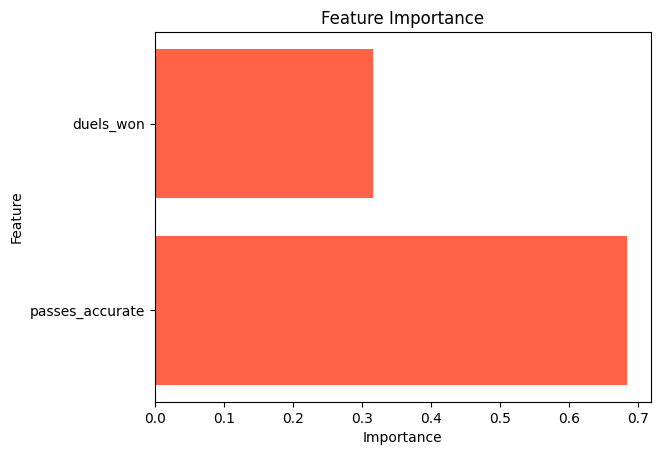

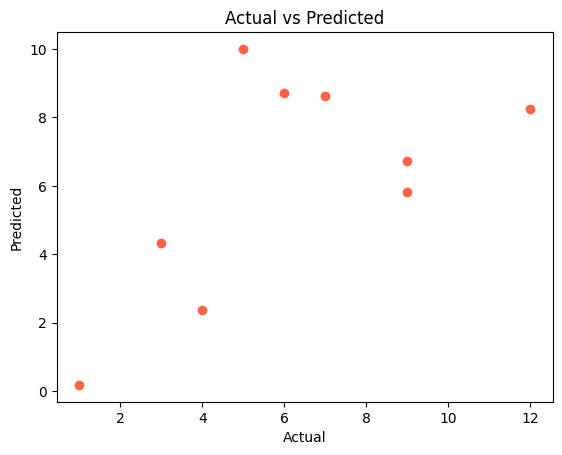

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'duels_won']]
y = normalized_df['long_passes_accurate']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f"  % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='tomato') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='tomato')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

### Based on Duels Won

Mean cross-validation score: 0.41
MAE: 2.415370954407586
MSE: 7.350363282339889
R^2: -1.522794177413267


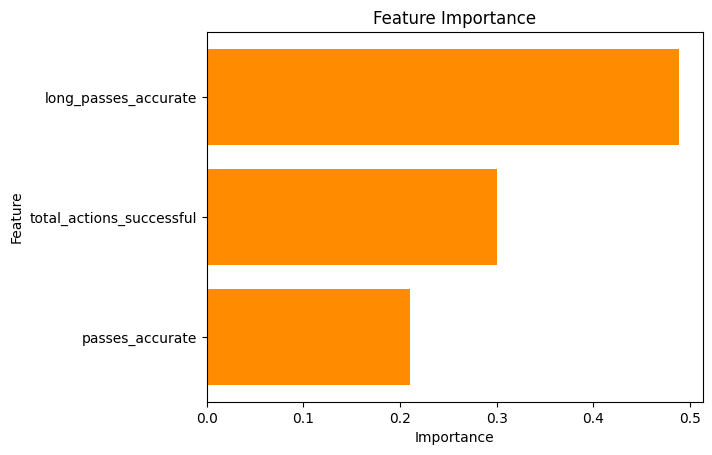

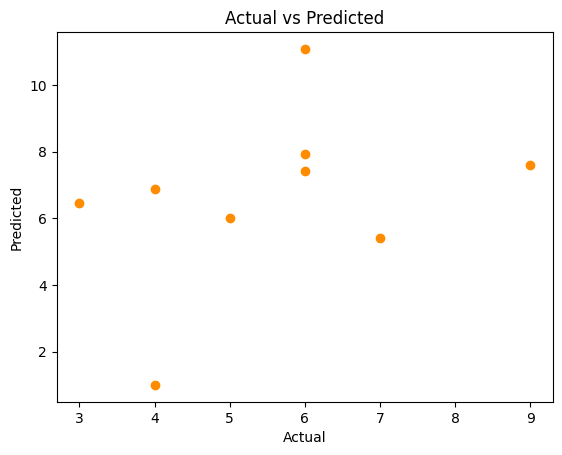

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'total_actions_successful', 'long_passes_accurate']]
y = normalized_df['duels_won']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = XGBRegressor()
model.fit(X_train, y_train)

# Implementing cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Feature importance
feat_importances = model.feature_importances_
plt.barh(X.columns, feat_importances, color='darkorange') 
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Actual vs Predicted values
plt.scatter(y_test, y_pred, color='darkorange')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Conformal Predictions

#### Provides a prediction interval such that:

$$ P(y \in [L(x), U(x)]) = 1 - \alpha $$

#### where $$ L(x) $$ and $$ U(x) $$ are the lower and upper bounds of the prediction interval, and $$ \alpha $$ is the significance level.

### Based on Total Actions

Prediction interval coverage: 68.24%
Average prediction interval width: 62.03


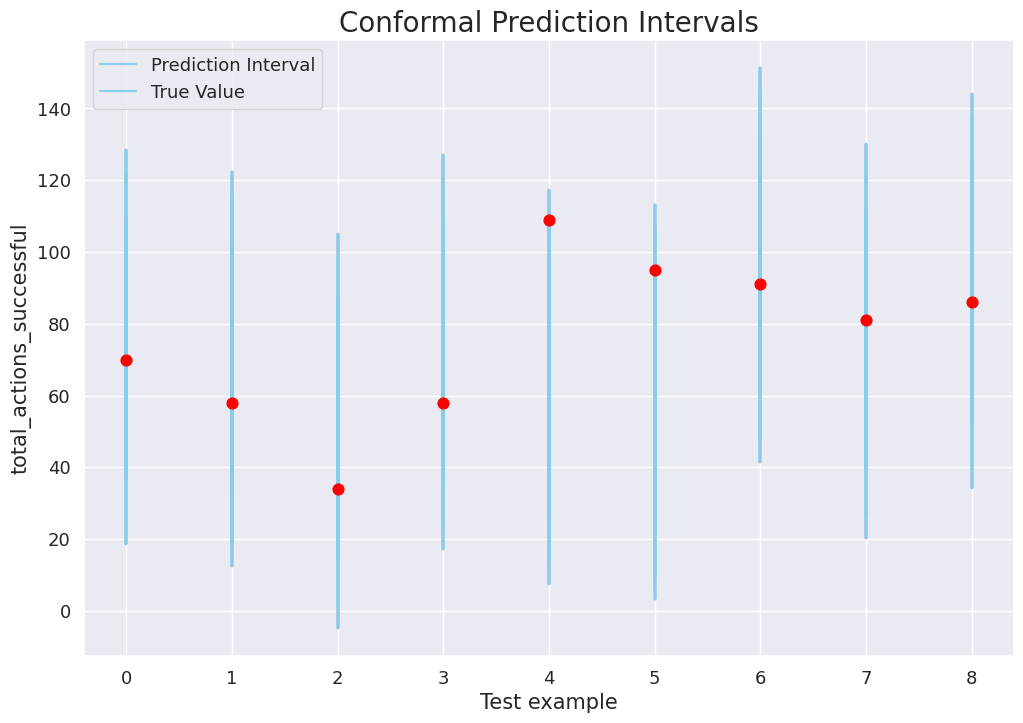

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[['duels_won', 'losses_own_half', 'interceptions']]
y = normalized_df['total_actions_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('total_actions_successful', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (68.24%): this could be coincidental or indicative of some underlying pattern or structural similarity in how Total Actions are distributed for these two players. From a modeling perspective, this coverage level might be acceptable, but it also reveals room for improvement in capturing the specific nuances of Total Actions. Investigating potential differences in playing style, position, or tactical role between the players could provide insights into model refinement.On football optics, a coverage of 68.24% for Toni Kroos in Total Actions might highlight his consistent involvement in games. As a central midfielder, Kroos is known for his passing ability, vision, and control of the game. This coverage might reflect his steady and essential role in the team's play, though the moderate coverage also suggests variations influenced by game situations, tactics, and personal performance factors.

Average prediction interval width (62.03): is a wide interval, identical to the one we analyzed for Vinicius Jr. This could signal a similar level of uncertainty in predicting Total Actions across different players. It might also prompt questions about the model's generalization across various positions or playing styles. Investigating how this width relates to the scale and context of Total Actions and considering potential position-specific or player-specific adjustments might be valuable for enhancing the model's relevance and precision.On football optics, when considering Toni Kroos's Total Actions, an average prediction interval width of 62.03 could be seen as representative of his multifunctional role on the field. Known for his strategic thinking and ability to influence various aspects of the game, this wide interval may symbolize his versatility. However, it might also hint at fluctuations in his performance depending on the match conditions or opponent strategies. Understanding the broad scope of his contributions and potential variations could provide valuable insights into his playing style and areas where focused development might enhance his consistency.

In summary, the outcomes of the Conformal Prediction Model related to Total Actions for Toni Kroos provide a complex view that intertwines statistical modeling with the intricacies of football. The moderate coverage and wide prediction interval reveal a multifaceted picture that encapsulates both the challenges of modeling such a comprehensive feature and the dynamic nature of Kroos's on-field contributions. These insights can foster further exploration, model fine-tuning, and a richer understanding of this esteemed player's game. 

### Based on Pass Accuracy

Prediction interval coverage: 60.94%
Average prediction interval width: 5.89


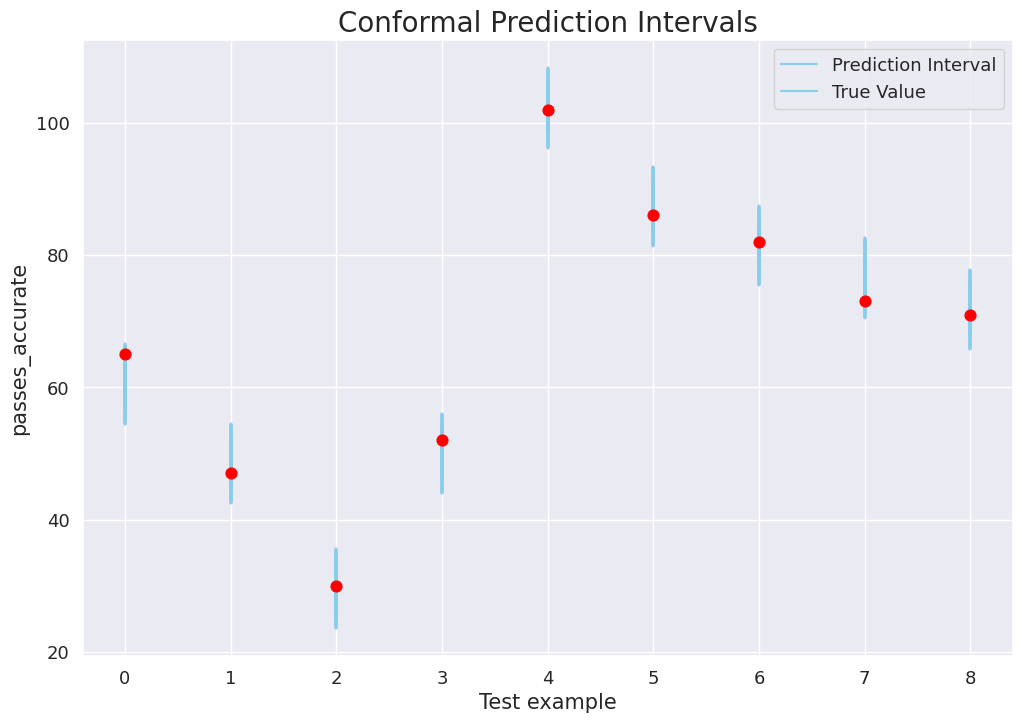

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[['total_actions_successful', 'duels_won', 'losses_own_half', 'long_passes_accurate']]
y = normalized_df['passes_accurate']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('passes_accurate', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (60.94%):is at the lower end of what we've analyzed so far. This percentage suggests that just over half of the actual observations lie within the predicted intervals, indicating a moderate fit between the predictions and the observed data. It might be seen as an area where the model could benefit from further refinement. The lower coverage might result from high variability in the data, unaccounted-for features, or model misspecification. Further investigation into the nature of the data and the modeling choices would likely help in understanding and improving this aspect.On football optics, might reflect a part of his game that's more unpredictable or influenced by various external factors. Kroos is known for his technical skill and strategic acumen, but this lower coverage might indicate areas where his performance varies more widely. Understanding the specific feature under consideration and the context of the games might provide more detailed insights into what this coverage reveals about his play.

Average prediction interval width (5.89): represents the range in which the model expects the true values to lie. Depending on the specific feature under consideration and the scale of the data, this width might be indicative of a particular level of uncertainty in the predictions. A more comprehensive understanding of the nature of the feature being predicted would be essential in interpreting this interval width accurately. If it's too broad or too narrow for the application's needs, additional model tuning and validation might be necessary.On football optics, could signify various things depending on the specific aspect of his game being modeled. Without knowing the precise feature, it could be seen as reflecting a balance in his performance across different scenarios or a variability that depends on the context. Understanding the exact nature of what's being modeled could help in providing more targeted insights into his playing style and potential areas for development.

In conclusion, the outcomes related to Toni Kroos provide insights that, while valuable, would benefit greatly from understanding the specific feature being modeled. The moderate coverage and the particular prediction interval width present a picture that hints at complexity and variability but requires more context for full interpretation. Both from a data science and sports perspective, these measures can act as starting points for further exploration, model refinement, and in-depth analysis of Kroos's game. 

### Based on Long Pass Accuracy

Prediction interval coverage: 68.01%
Average prediction interval width: 6.90


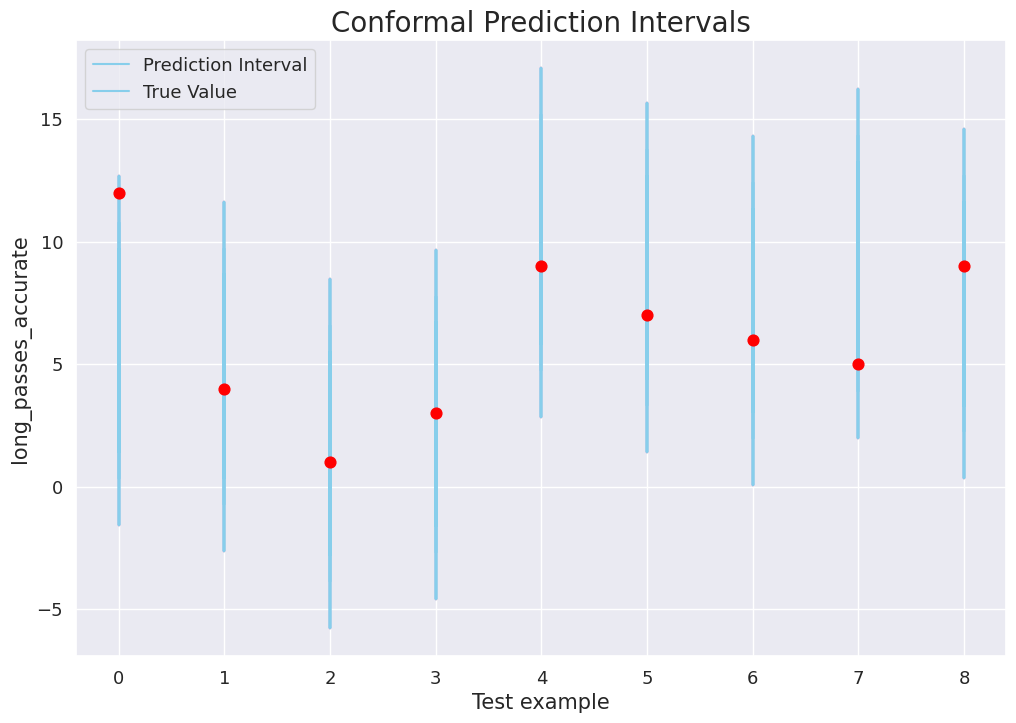

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[['passes_accurate','total_actions_successful', 'duels_won', 'losses_own_half']]
y = normalized_df['long_passes_accurate']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('long_passes_accurate', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (68.01%): is relatively moderate, indicating that the model's predicted intervals contain just over two-thirds of the actual observations. For a specific skill like Long Pass Accuracy, especially for a player renowned for his passing abilities like Kroos, this coverage may reflect a reasonable alignment with the observed data but also suggests room for further optimization. Investigating how the model handles contextual variables, like opposition tactics or match conditions, may provide insights to increase this coverage. On football optics, may underline his reputation as one of the top midfielders in the world, particularly known for his long-range passing abilities. However, this figure also indicates a degree of variability in his performance in this area, possibly dependent on factors like the quality of opposition, tactical setup, or individual match scenarios. Understanding these nuances might offer insights into how to optimize his contributions in this key aspect of his game.

Average prediction interval width (6.90): is a specific measure that needs to be interpreted in the context of the scale and distribution of Long Pass Accuracy. If this interval width is appropriate for the underlying data, it suggests a balance between capturing the variability in the data and maintaining reasonable prediction precision. Evaluating this width against the actual range and distribution of Long Pass Accuracy values would help to ascertain if it's overly conservative or well-calibrated. On football optics, could be seen as representing the range of variability in his long passing game. It may reflect fluctuations based on match dynamics, opponent's strategies, or other contextual variables. While this width acknowledges the complexity of predicting such a specific skill, it might also guide attention to particular aspects of his game that could be fine-tuned to enhance consistency and effectiveness in his long passes.

In summary, the outcomes related to Long Pass Accuracy for Toni Kroos reveal insights that intertwine statistical modeling with the subtleties of football. The moderate coverage and specific prediction interval width give a glimpse into both the challenges of modeling a highly specialized skill and the dynamic nature of Kroos's long-range passing abilities. These insights could guide further exploration and refinement of the model and contribute to a richer understanding of this key aspect of Kroos's playing style. 

### Based on Duels Won

Prediction interval coverage: 63.64%
Average prediction interval width: 3.89


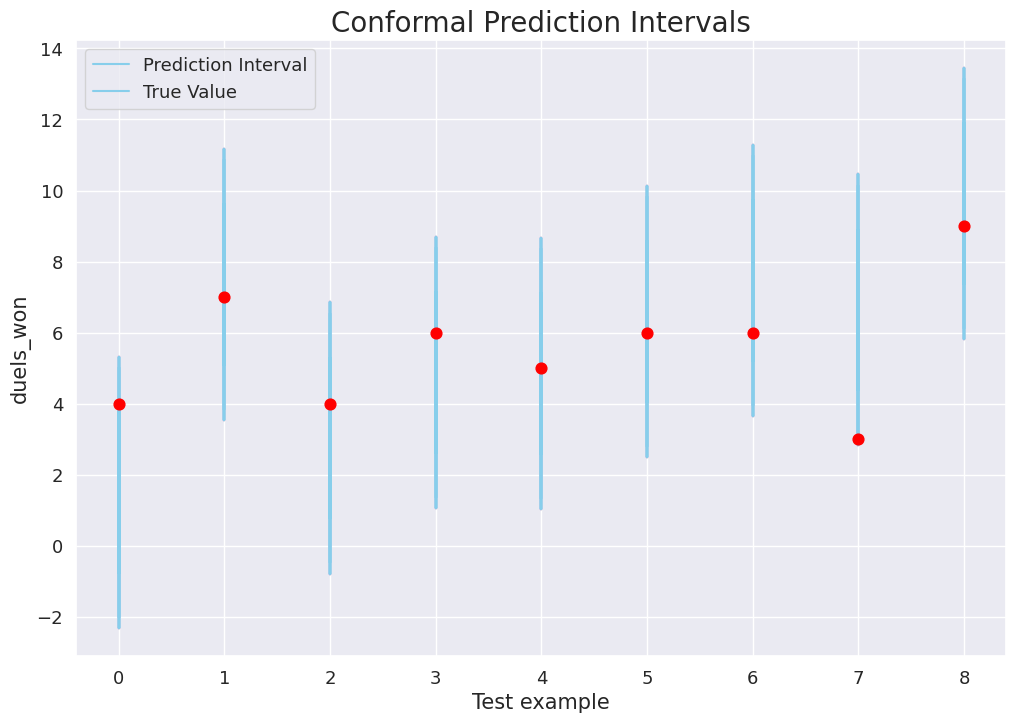

In [ ]:
# Set the theme for seaborn
sns.set_theme()

# Prepare the data
X = normalized_df[['passes_accurate', 'total_actions_successful', 'losses_own_half', 'recoveries_opp_half', 'interceptions', 'long_passes_accurate']]
y = normalized_df['duels_won']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('duels_won', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

Prediction interval coverage (63.64%): represents a moderate alignment between the model's predictions and the observed data for Duels Won. This indicates that roughly two-thirds of the actual observations lie within the predicted intervals. While this may provide a general representation, there appears to be room for enhancing the model's ability to predict this aspect of Kroos's game. Understanding the nature of the duels and considering additional contextual features like opponent's skill level or match situations might enhance this metric.On football optics, might illustrate his playing style, which, while not primarily focused on winning duels, certainly involves competing for possession. This coverage may suggest variations in his ability to win duels based on specific opponents or game situations. It might also point to the influence of his role within the team's tactical setup, where his strengths in passing and positioning might outweigh his contributions in duels.

Average prediction interval width (3.89): is a measure that needs to be interpreted in the context of the scale and distribution of Duels Won. Assuming this width is aligned with the underlying data, it may suggest a moderate level of uncertainty in the model's predictions. Analyzing this width in relation to the actual range and variability of Duels Won could provide insights into the model's calibration. If it's found to be too wide or too narrow, further investigation and refinement may be necessary. On football optics, could represent the range of variability in this aspect of his game. Kroos is renowned more for his passing and playmaking abilities than for winning physical duels. This width might reflect fluctuations that depend on various match dynamics or the nature of the duels he engages in. Understanding these factors could lead to more targeted training or tactical adjustments to enhance his effectiveness in duels, balancing his overall contribution to the team.

In conclusion, the Conformal Prediction Model's outcomes related to Duels Won for Toni Kroos present a complex view that merges statistical modeling with the intricacies of his playing style. The moderate coverage and specific prediction interval width reveal insights into both the challenges of modeling this feature and the variability in Kroos's duel-winning abilities. These findings may guide further analysis, model optimization, and a more nuanced understanding of this aspect of Kroos's game.

## Radar Map Visualization

### Kroos Performance 1st Leg PSG (2022)

- Total Actions Success (TAS): 72%

- Passes Accurate (PA): 89%

- Long Passes Accurate 67%

- Duels Won (DW): 62%

- Losses (LOH): 60%

- Recoveries (ROPH): 20%

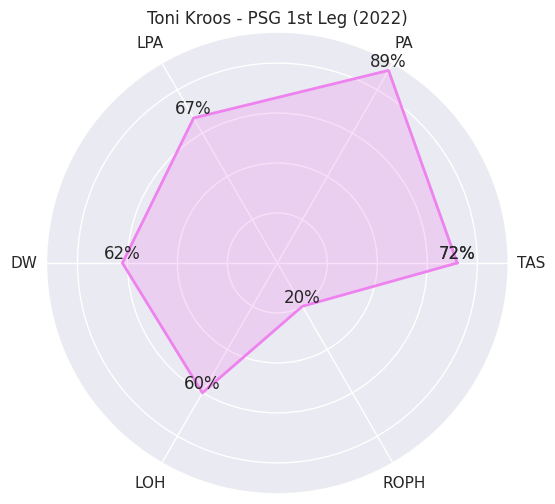

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'LOH', 'ROPH'])
stats = np.array([72, 89, 67, 62, 60, 20])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Toni Kroos - PSG 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='violet', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='violet', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Kroos Performance PSG 2nd Leg (2022)

- Total Actions Success (TAS): 83%

- Passes Accurate (PA): 98%

- Long Passes Accurate 100%

- Duels Won (DW): 50%

- Losses (LOH): 100%

- Recoveries (ROPH): 80%

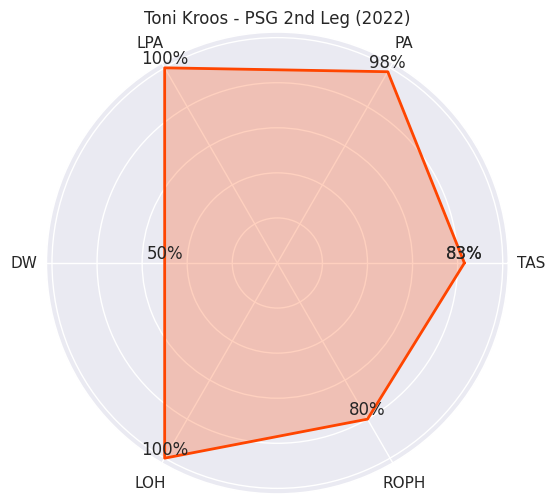

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'LOH', 'ROPH'])
stats = np.array([83, 98, 100, 50, 100, 80])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Toni Kroos - PSG 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='orangered', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='orangered', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Kroos Performance Chelsea 1st Leg (2022)

- Total Actions Success (TAS): 81%

- Passes Accurate (PA): 92%

- Long Passes Accurate 67%

- Duels Won (DW): 73%

- Losses (LOH): 40%

- Recoveries (ROPH): 0%

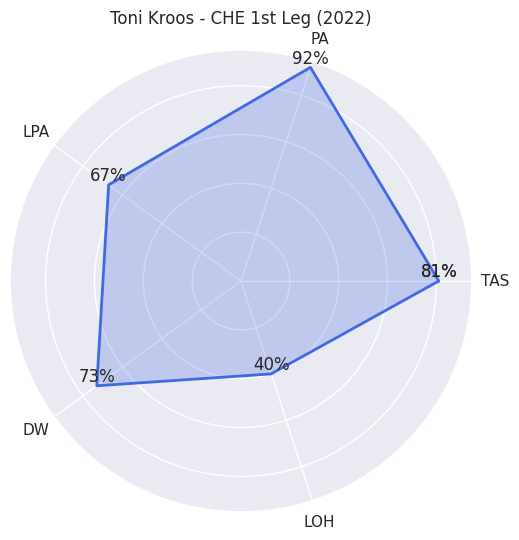

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'LOH'])
stats = np.array([81, 92, 67, 73, 40])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Toni Kroos - CHE 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='royalblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='royalblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Kroos Performance Chelsea 2nd Leg (2022)

Total Actions Success (TAS): 76%

- Passes Accurate (PA): 90%

- Long Passes Accurate 67%

- Duels Won (DW): 50%

- Losses (LOH): 17%

- Recoveries (ROPH): 67%

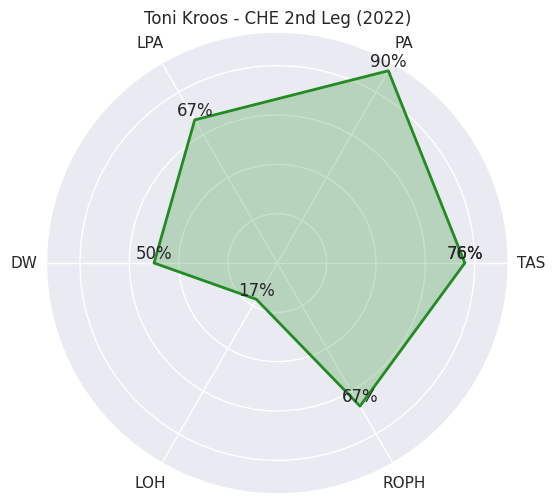

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'LOH', 'ROPH'])
stats = np.array([76, 90, 67, 50, 17, 67])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Toni Kroos - CHE 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='forestgreen', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='forestgreen', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Kroos Performance Man City 1st Leg (2022)

- Total Actions Success (TAS): 77%

- Passes Accurate (PA): 91%

- Long Passes Accurate 50%

- Duels Won (DW): 50%

- Losses (LOH): 29%

- Recoveries (ROPH): 40%

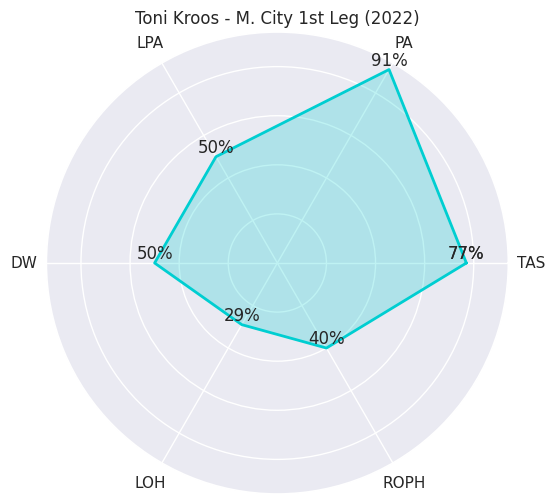

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'LOH', 'ROPH'])
stats = np.array([77, 91, 50, 50, 29, 40])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Toni Kroos - M. City 1st Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='darkturquoise', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='darkturquoise', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Kroos Performance Man City 2nd Leg (2022)

- Total Actions Success (TAS): 67%

- Passes Accurate (PA): 90%

- Long Passes Accurate 67%

- Duels Won (DW): 40%

- Losses (LOH): 100%

- Recoveries (ROPH): 60%

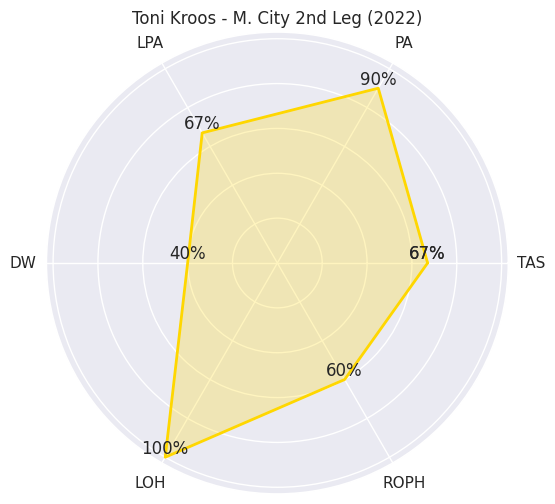

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'LOH', 'ROPH'])
stats = np.array([67, 90, 67, 40, 100, 60])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Toni Kroos - M. City 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='gold', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='gold', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Kroos Performance Final (2022)

Total Actions Success (TAS): 74%

- Passes Accurate (PA): 92%

- Long Passes Accurate 69%

- Duels Won (DW): 64%

- Losses (LOH): 33%

- Recoveries (ROPH): 38%

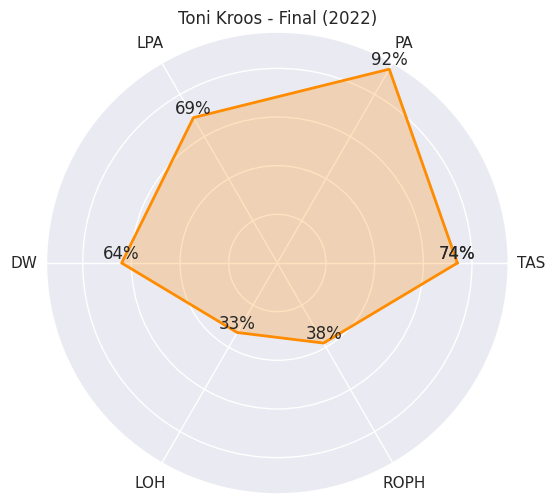

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'LOH', 'ROPH'])
stats = np.array([74, 92, 69, 64, 33, 38])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Toni Kroos - Final (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='darkorange', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='darkorange', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Kroos Performance Liv 1st Leg (2022)

- Total Actions Success (TAS): 86%

- Passes Accurate (PA): 90%

- Long Passes Accurate 0%

- Duels Won (DW): 0%

- Losses (LOH): 0%

- Recoveries (ROPH): 0%

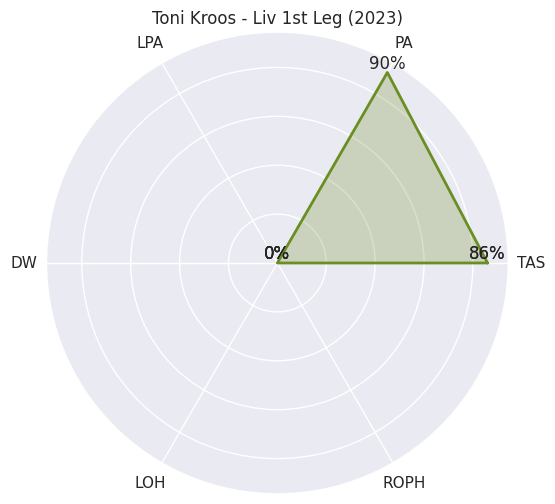

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'LPA', 'DW', 'LOH', 'ROPH'])
stats = np.array([86, 90, 0, 0, 0, 0])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Toni Kroos - Liv 1st Leg (2023)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='olivedrab', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='olivedrab', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### Kroos Performance Man City 2nd (2023)

- Total Actions Success (TAS): 74%

- Passes Accurate (PA): 90%

- Long Passes Accurate 0%

- Duels Won (DW): 14%

- Losses (LOH): 50%

- Recoveries (ROPH): 29%

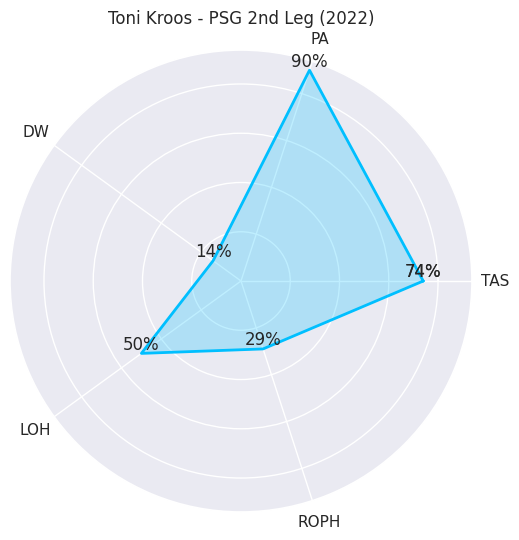

In [ ]:
# Define the data for the radar chart
labels = np.array(['TAS', 'PA', 'DW', 'LOH', 'ROPH'])
stats = np.array([74, 90, 14, 50, 29])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title("Toni Kroos - PSG 2nd Leg (2022)")

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='deepskyblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='deepskyblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f9a70cf5-e16c-4af2-bcd6-e50a7dd7b930' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>